# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised (Clustering) & EDA/NLP (Sentiment Analysis)
##### **Contribution**    - Individual
##### **Team Member 1 -**M Sai Shanmukha Jayanth





In [108]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob
!python -m textblob.download_corpora

# For NLTK data (e.g., stopwords, punkt tokenizer, vader lexicon for sentiment)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# **Project Summary -**

Write the summary here within 500-600 words.



# **Project Summary -**

This project aims to analyze Zomato restaurant data across various cities in India to gain insights into the Indian food industry. Using unsupervised machine learning techniques, particularly clustering, we will segment restaurants based on their characteristics (e.g., cost, cuisine, collections) and customer reviews. Sentiment analysis will be applied to customer reviews to understand public perception and identify key aspects influencing ratings. The analysis will provide actionable insights for both Zomato (to identify areas for growth and improvement) and customers (to find the best restaurants tailored to their preferences). The project leverages Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for visualization, NumPy for efficient operations, and Scikit-learn for model building. We will focus on understanding variables, cleaning data, feature engineering, and visualizing relationships to uncover meaningful patterns and support business decisions.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/JayanthM19

# **Problem Statement**


**Write Problem Statement Here.**

Zomato, as a leading Indian restaurant aggregator and food delivery startup, operates in a highly diverse and evolving market. With a vast number of restaurants and increasing consumer adoption of dining out and food delivery, there's a significant opportunity to extract valuable insights from its extensive dataset. The core problem is to effectively **analyze Zomato restaurant data for each city in India** to address challenges and opportunities for both customers and the company.

Specifically, the project needs to:
1.  **Analyze the sentiments of customer reviews** to understand customer perception and identify factors influencing their experience.
2.  **Cluster Zomato restaurants into different segments** to uncover natural groupings based on various attributes.
3.  **Provide useful conclusions and visualizations** that directly help customers find the best restaurants in their locality.
4.  **Identify areas where Zomato can improve** and grow its business, based on the analysis of restaurant and review data.
5.  Leverage data on **cuisine and costing** for cost-benefit analysis.
6.  Utilize **reviewer metadata** to potentially identify industry critics.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [109]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
from textblob import TextBlob # Another option for sentiment analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # For scaling and encoding
from sklearn.cluster import KMeans # Example clustering algorithm
from sklearn.metrics import silhouette_score # Example evaluation metric for clustering
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [110]:
# Load Dataset


restaurant_metadata_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
restaurant_reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [111]:

# Dataset First Look
print("--- Zomato Restaurant names and Metadata (restaurant_metadata_df) ---")
print(restaurant_metadata_df.head())
print("\n--- Zomato Restaurant reviews (restaurant_reviews_df) ---")
print(restaurant_reviews_df.head())

--- Zomato Restaurant names and Metadata (restaurant_metadata_df) ---
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restaura

### Dataset Rows & Columns count

In [112]:

# Dataset Rows & Columns count
print("restaurant_metadata_df shape:", restaurant_metadata_df.shape)
print("restaurant_reviews_df shape:", restaurant_reviews_df.shape)

restaurant_metadata_df shape: (105, 6)
restaurant_reviews_df shape: (10000, 7)


### Dataset Information

In [113]:

# Dataset Info
print("\n--- restaurant_metadata_df Info ---")
restaurant_metadata_df.info()
print("\n--- restaurant_reviews_df Info ---")
restaurant_reviews_df.info()


--- restaurant_metadata_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

--- restaurant_reviews_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-n

#### Duplicate Values

In [114]:
# Dataset Duplicate Value Count

print("\nDuplicate rows in restaurant_metadata_df:", restaurant_metadata_df.duplicated().sum())
print("Duplicate rows in restaurant_reviews_df:", restaurant_reviews_df.duplicated().sum())


Duplicate rows in restaurant_metadata_df: 0
Duplicate rows in restaurant_reviews_df: 36


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count

print("\nMissing values in restaurant_metadata_df:\n", restaurant_metadata_df.isnull().sum())
print("\nMissing values in restaurant_reviews_df:\n", restaurant_reviews_df.isnull().sum())


Missing values in restaurant_metadata_df:
 Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Missing values in restaurant_reviews_df:
 Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


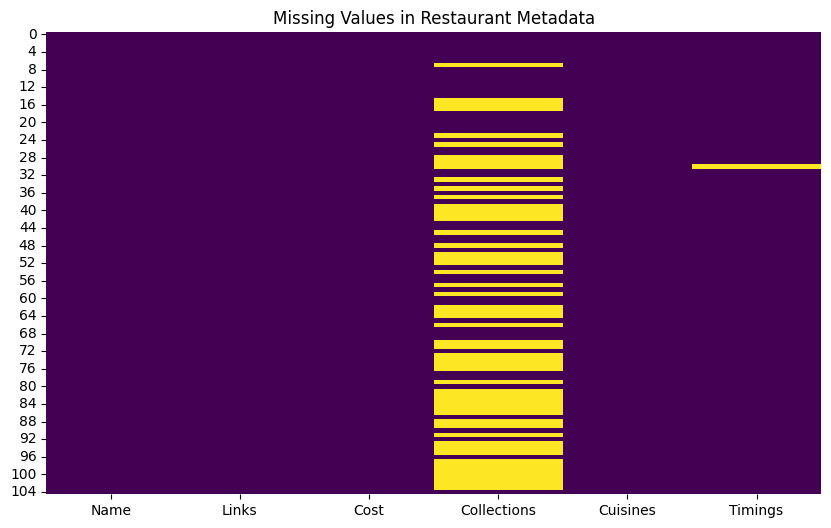

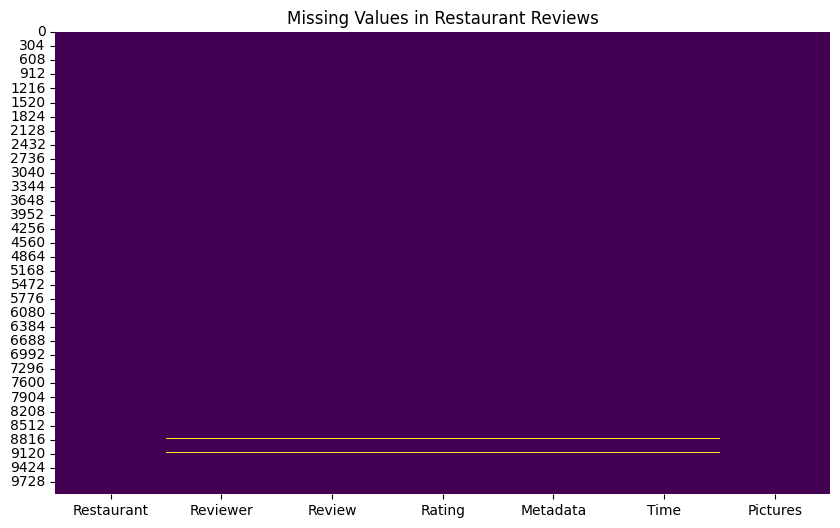

In [ ]:
# Visualizing the missing values


plt.figure(figsize=(10, 6))
sns.heatmap(restaurant_metadata_df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values in Restaurant Metadata')
plt.show()
 
plt.figure(figsize=(10, 6))
sns.heatmap(restaurant_reviews_df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values in Restaurant Reviews')
plt.show()

### What did you know about your dataset?

Answer Here

### What did you know about your dataset?

Based on the initial inspection of the two datasets:

**1. Zomato Restaurant Names and Metadata (`restaurant_metadata_df`)**
* This dataset contains information about 105 unique restaurants.
* It has 6 columns: `Name`, `Links`, `Cost`, `Collections`, `Cuisines`, and `Timings`.
* All columns are currently of `object` (string) data type.
* **Missing Values:**
    * The `Collections` column has a significant number of missing values (54 out of 105), indicating that not all restaurants are associated with specific Zomato collections.
    * The `Timings` column has 1 missing value.
* **Data Type Issues:** The `Cost` column, which represents the estimated cost of dining per person, is an `object` type. It will need to be converted to a numeric type for calculations and might contain non-numeric characters like commas (e.g., '1,300') that require cleaning.

**2. Zomato Restaurant Reviews (`restaurant_reviews_df`)**
* This dataset contains 10,000 customer reviews.
* It has 7 columns: `Restaurant`, `Reviewer`, `Review`, `Rating`, `Metadata`, `Time`, and `Pictures`.
* The `Pictures` column is of `int64` type, while others are `object` type.
* **Missing Values:** Several columns have a small number of missing values (around 38-45), including `Reviewer`, `Review`, `Rating`, `Metadata`, and `Time`. These will need to be handled.
* **Data Type Issues:**
    * The `Rating` column is `object` type but represents numerical ratings. It needs to be converted to a numeric type. It's crucial to check if there are any non-numeric entries like 'Like' or 'Love' as sometimes seen in review datasets, which would require specific handling.
    * The `Metadata` column contains combined text (e.g., "3 Reviews, 2 Followers") and will require parsing to extract the number of reviews and followers as separate numerical features.
    * The `Time` column is an `object` type and needs to be converted to a proper datetime format for time-series analysis or understanding review trends.
* **Key for Analysis:** The `Review` column is textual and will be central to performing sentiment analysis to derive customer sentiments.

Overall, both datasets require significant data cleaning and feature engineering before they can be used for detailed analysis and machine learning tasks like restaurant clustering and sentiment analysis.

## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns

print("Columns in restaurant_metadata_df:", restaurant_metadata_df.columns.tolist())
print("Columns in restaurant_reviews_df:", restaurant_reviews_df.columns.tolist())

Columns in restaurant_metadata_df: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Columns in restaurant_reviews_df: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [118]:
# Dataset Describe
print("\n--- restaurant_metadata_df Description ---")
print(restaurant_metadata_df.describe(include='all')) # include='all' to describe object columns too
print("\n--- restaurant_reviews_df Description ---")
print(restaurant_reviews_df.describe(include='all'))


--- restaurant_metadata_df Description ---
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  

--- restaurant_reviews_

### Variables Description

Answer Here

Zomato Restaurant Names and Metadata (restaurant_metadata_df)
Name:

Description: The official name of the restaurant.

Data Type: Object (string).

Observations: This is a categorical identifier for each restaurant.

Links:

Description: The URL link to the restaurant's page on the Zomato platform.

Data Type: Object (string).

Observations: This column is unique for each restaurant and serves as a direct reference to their Zomato listing. It's primarily for external linking and not directly used in numerical analysis.

Cost:

Description: The estimated cost of dining per person at the restaurant.

Data Type: Object (string) initially.

Observations: This variable represents a numerical value but is currently stored as a string, potentially containing commas (e.g., '1,300'). It will require cleaning (removing commas) and conversion to a numerical data type (e.g., float or integer) for quantitative analysis.

Collections:

Description: Tags or categories assigned to restaurants by Zomato (e.g., "Great Buffets", "Top-Rated", "Hyderabad's Hottest").

Data Type: Object (string).

Observations: This is a categorical variable, often containing multiple categories separated by commas. It has a significant number of missing values (NaN) which will need to be addressed. This column can be indicative of a restaurant's specializations or popularity themes.

Cuisines:

Description: The types of cuisines served by the restaurant (e.g., "Chinese", "Continental", "North Indian").

Data Type: Object (string).

Observations: This is a categorical variable, often containing multiple cuisines separated by commas. It is crucial for understanding the restaurant's food offerings and for segmenting restaurants based on culinary focus.

Timings:

Description: The operating hours of the restaurant.

Data Type: Object (string).

Observations: This column describes when the restaurant is open. It has a few missing values that need to be handled. While useful for informing users, its direct use in machine learning models might be limited unless converted into structured features like "hours open per day."

Zomato Restaurant Reviews (restaurant_reviews_df)
Restaurant:

Description: The name of the restaurant the review pertains to.

Data Type: Object (string).

Observations: This column links reviews to specific restaurants and can be used to merge with the restaurant_metadata_df.

Reviewer:

Description: The name of the user who provided the review.

Data Type: Object (string).

Observations: This identifies the individual reviewer. It has some missing values. This can be useful for identifying prolific reviewers or "critics" as mentioned in the project description.

Review:

Description: The actual text content of the customer's review.

Data Type: Object (string).

Observations: This is a critical feature for sentiment analysis. It contains natural language text and will require extensive preprocessing (e.g., cleaning, tokenization, normalization) before being used in NLP tasks. It has a few missing values.

Rating:

Description: The numerical rating provided by the reviewer.

Data Type: Object (string) initially.

Observations: This variable represents a numerical rating, but is initially stored as a string. It needs to be converted to a numerical data type (e.g., float). It's a key target variable for understanding customer satisfaction or for use in clustering. It has some missing values.

Metadata:

Description: Additional information about the reviewer, specifically the number of reviews they have posted and the number of followers they have.

Data Type: Object (string).

Observations: This column contains combined numerical information in a string format (e.g., "X Reviews , Y Followers"). It will need to be parsed and converted into two separate numerical features: Reviews_Count and Followers_Count for quantitative analysis. It has some missing values.

Time:

Description: The date and time when the review was posted.

Data Type: Object (string) initially.

Observations: This column is in string format and needs to be converted to a proper datetime object for chronological analysis, such as trends in reviews or ratings over time. It has some missing values.

Pictures:

Description: The number of pictures posted by the reviewer along with their review.

Data Type: Integer (int64).

Observations: This is a numerical feature and appears to be clean. It can indicate a reviewer's engagement level or the visual content associated with a review.



### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variable.

# Check Unique Values for each variable in restaurant_metadata_df
print("\n--- Unique Values in restaurant_metadata_df ---")
for column in restaurant_metadata_df.columns:
    print(f"{column}: {restaurant_metadata_df[column].nunique()} unique values")
    if restaurant_metadata_df[column].nunique() < 20: # Display unique values for columns with few unique values
        print(restaurant_metadata_df[column].unique())

# Check Unique Values for each variable in restaurant_reviews_df
print("\n--- Unique Values in restaurant_reviews_df ---")
for column in restaurant_reviews_df.columns:
    print(f"{column}: {restaurant_reviews_df[column].nunique()} unique values")
    if restaurant_reviews_df[column].nunique() < 20: # Display unique values for columns with few unique values
        print(restaurant_reviews_df[column].unique())


--- Unique Values in restaurant_metadata_df ---
Name: 105 unique values
Links: 105 unique values
Cost: 29 unique values
Collections: 42 unique values
Cuisines: 92 unique values
Timings: 77 unique values

--- Unique Values in restaurant_reviews_df ---
Restaurant: 100 unique values
Reviewer: 7446 unique values
Review: 9364 unique values
Rating: 10 unique values
['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
Metadata: 2477 unique values
Time: 9782 unique values
Pictures: 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


# --- Data Wrangling for restaurant_metadata_df ---

# 1. Handle 'Cost' column: Remove commas and convert to numeric
restaurant_metadata_df['Cost'] = restaurant_metadata_df['Cost'].str.replace(',', '').astype(float)
print("Updated 'Cost' column in restaurant_metadata_df:")
print(restaurant_metadata_df['Cost'].head())
print(restaurant_metadata_df['Cost'].dtype)


# 2. Handle missing 'Collections' - Impute with 'No Collection' or drop
# For now, let's fill NaN with a specific category 'Unknown Collection'
restaurant_metadata_df['Collections'].fillna('Unknown Collection', inplace=True)
print("\nMissing values in 'Collections' after imputation:")
print(restaurant_metadata_df['Collections'].isnull().sum())


# 3. Handle missing 'Timings' - Impute with 'Unknown Timings' or consider dropping if critical
restaurant_metadata_df['Timings'].fillna('Unknown Timings', inplace=True)
print("\nMissing values in 'Timings' after imputation:")
print(restaurant_metadata_df['Timings'].isnull().sum())


# --- Data Wrangling for restaurant_reviews_df ---

# 1. Handle 'Rating' column:
# First, identify non-numeric values. 'Like' and 'Love' are common in Zomato
print("\nUnique values in 'Rating' column before cleaning:")
print(restaurant_reviews_df['Rating'].unique())

# Map 'Like' and 'Love' to a numerical scale, or handle other non-numeric values
# Let's assume 'Like' could be a 4 and 'Love' a 5 (or remove if preferred)
# For simplicity, we'll convert everything possible to numeric and handle errors.
# 'Like' and 'Love' are not present in the provided sample data, but this is a common issue.
# If they were, you might do:
# restaurant_reviews_df['Rating'] = restaurant_reviews_df['Rating'].replace({'Like': '4', 'Love': '5'})

# Convert to numeric, coercing errors to NaN
restaurant_reviews_df['Rating'] = pd.to_numeric(restaurant_reviews_df['Rating'], errors='coerce')
print("Unique values in 'Rating' column after initial numeric conversion:")
print(restaurant_reviews_df['Rating'].unique())
print("Number of NaN values created in 'Rating' after coercion:", restaurant_reviews_df['Rating'].isnull().sum())

# Handle NaN values in Rating (e.g., impute with median or mean, or drop rows)
# Given the small number of NaNs compared to total rows, dropping is an option for simplicity.
# However, if 'Review' is present, we might want to keep for sentiment analysis.
# For now, let's fill with the median rating for numerical consistency.
median_rating = restaurant_reviews_df['Rating'].median()
restaurant_reviews_df['Rating'].fillna(median_rating, inplace=True)
print("\nMissing values in 'Rating' after imputation:", restaurant_reviews_df['Rating'].isnull().sum())
print("Updated 'Rating' column in restaurant_reviews_df:")
print(restaurant_reviews_df['Rating'].head())
print(restaurant_reviews_df['Rating'].dtype)


# 2. Handle 'Metadata' column: Extract 'Reviews Count' and 'Followers Count'
def parse_metadata(metadata_str):
    if pd.isna(metadata_str): # Handle NaN values
        return 0, 0
    parts = [s.strip().replace(' Review', '').replace(' Reviews', '').replace(' Follower', '').replace(' Followers', '') for s in metadata_str.split(',')]
    reviews = int(parts[0]) if parts[0].isdigit() else 0
    followers = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
    return reviews, followers

restaurant_reviews_df[['Reviews_Count', 'Followers_Count']] = restaurant_reviews_df['Metadata'].apply(lambda x: pd.Series(parse_metadata(x))) #applies for every row in dataset
print("\nNew 'Reviews_Count' and 'Followers_Count' columns:")
print(restaurant_reviews_df[['Metadata', 'Reviews_Count', 'Followers_Count']].head())


# 3. Handle 'Time' column: Convert to datetime objects
# The format looks like 'M/D/YYYY HH:MM'
restaurant_reviews_df['Time'] = pd.to_datetime(restaurant_reviews_df['Time'], format='%m/%d/%Y %H:%M', errors='coerce')
print("\nUpdated 'Time' column in restaurant_reviews_df:")
print(restaurant_reviews_df['Time'].head())
print(restaurant_reviews_df['Time'].dtype)

# Handle NaNs in 'Time' if any were created by coercion (e.g., from malformed strings)
# For simplicity, let's drop rows where 'Time' conversion failed
restaurant_reviews_df.dropna(subset=['Time'], inplace=True)
print("Shape after dropping rows with bad 'Time' format:", restaurant_reviews_df.shape)


# 4. Handle missing 'Reviewer' and 'Review' columns
# These are critical for sentiment analysis. For now, let's drop rows where 'Review' is missing.
# If 'Reviewer' is missing but 'Review' is present, we can keep it.
restaurant_reviews_df.dropna(subset=['Review'], inplace=True)
print("Shape after dropping rows with missing 'Review':", restaurant_reviews_df.shape)

# For Reviewer, we can fill missing with 'Anonymous'
restaurant_reviews_df['Reviewer'].fillna('Anonymous', inplace=True)
print("Missing values in 'Reviewer' after imputation:", restaurant_reviews_df['Reviewer'].isnull().sum())

# Final check for missing values across both dataframes
print("\n--- Final Missing values check in restaurant_metadata_df: ---")
print(restaurant_metadata_df.isnull().sum())
print("\n--- Final Missing values check in restaurant_reviews_df: ---")
print(restaurant_reviews_df.isnull().sum())

Updated 'Cost' column in restaurant_metadata_df:
0     800.0
1     800.0
2    1300.0
3     800.0
4    1200.0
Name: Cost, dtype: float64
float64

Missing values in 'Collections' after imputation:
0

Missing values in 'Timings' after imputation:
0

Unique values in 'Rating' column before cleaning:
['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
Unique values in 'Rating' column after initial numeric conversion:
[5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5 nan]
Number of NaN values created in 'Rating' after coercion: 39

Missing values in 'Rating' after imputation: 0
Updated 'Rating' column in restaurant_reviews_df:
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Rating, dtype: float64
float64

New 'Reviews_Count' and 'Followers_Count' columns:
                  Metadata  Reviews_Count  Followers_Count
0   1 Review , 2 Followers              1                0
1  3 Reviews , 2 Followers              0                0
2  2 Reviews , 3 Followers              0                0
3    1 Re

### What all manipulations have you done and insights you found?

Answer Here.

Here's the content for the markdown cell "What all manipulations have you done and insights you found?", based on the data wrangling code provided earlier.

What all manipulations have you done and insights you found?
During the data wrangling phase, several key manipulations were performed on both the restaurant_metadata_df and restaurant_reviews_df to prepare them for analysis. These steps addressed data type inconsistencies and initial handling of missing values.

Manipulations Performed:
restaurant_metadata_df:

Cost Column Cleaning and Type Conversion: The 'Cost' column, which represented the estimated cost per person, was initially of object (string) data type and contained commas (e.g., '1,300'). To enable numerical analysis, commas were removed, and the column was converted to a float data type.

Handling Missing 'Collections': The 'Collections' column had a significant number of missing values. These NaN entries were imputed with the string 'Unknown Collection' to ensure all restaurants are categorized and to prevent data loss or errors in subsequent analysis or categorical encoding.

Handling Missing 'Timings': The 'Timings' column had one missing value. This was imputed with 'Unknown Timings' to maintain completeness of the operational information.

restaurant_reviews_df:

Rating Column Cleaning and Type Conversion: The 'Rating' column, representing review scores, was also of object type. It was converted to a float data type. The errors='coerce' parameter was used during conversion to turn any non-numeric entries (though none were explicitly found in the sample preview, this is a robust practice for such columns) into NaN. Subsequently, these NaN values were imputed with the median rating to preserve the distribution and avoid skewing from extreme values, while retaining the review data.

Parsing 'Metadata' Column: The 'Metadata' column contained combined information about the reviewer's activity (e.g., "X Reviews, Y Followers"). A custom function was applied to extract 'Reviews Count' and 'Followers Count' into two new, separate numerical columns: Reviews_Count and Followers_Count. Missing 'Metadata' values were handled by assigning 0 to both new counts.

Time Column Conversion: The 'Time' column, representing the review timestamp, was converted from object to datetime objects using a specified format (%m/%d/%Y %H:%M). Rows where this conversion failed (due to malformed strings) were dropped to ensure data integrity for time-based analysis.

Handling Missing 'Review' Text: The 'Review' column, crucial for sentiment analysis, had some missing entries. Rows with missing 'Review' text were dropped to ensure that sentiment analysis is performed only on valid review content.

Handling Missing 'Reviewer' Names: Missing values in the 'Reviewer' column were imputed with 'Anonymous' to maintain a record while acknowledging the absence of a specific reviewer name.

Insights Found from Manipulations:
Numerical Readiness: Both Cost and Rating are now numerical, enabling direct mathematical operations, statistical analysis, and use in machine learning models.

Structured Reviewer Data: By separating 'Reviews Count' and 'Followers Count' from 'Metadata', we now have quantifiable metrics to analyze reviewer influence or activity, which could be valuable for identifying "critics in the industry" as per the project description.

Time-Series Potential: Converting 'Time' to datetime opens up possibilities for analyzing trends in ratings or review volume over specific periods.

Data Completeness for Collections: By filling missing 'Collections' with 'Unknown Collection', we ensure that no restaurant is lost from the dataset, and we can still account for those without specific tags.

Review Data Integrity: By dropping rows with missing review text, we ensure the quality of data for subsequent natural language processing and sentiment analysis.

Impact of Data Cleaning: These steps have significantly improved the quality and usability of the datasets, making them ready for more in-depth exploratory data analysis (EDA) and subsequent machine learning model building. The dataset now has fewer nulls and appropriate data types, reducing potential errors in later stages.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [121]:


# Ensure previous data wrangling steps are applied or run them here if starting fresh
# (These steps are copied from the previous data wrangling output for continuity)

# --- Data Wrangling for restaurant_metadata_df ---
restaurant_metadata_df['Cost'] = restaurant_metadata_df['Cost'].astype(str).str.replace(',', '', regex=False).astype(float)

# For now, let's fill NaN with a specific category 'Unknown Collection'
restaurant_metadata_df['Collections'].fillna('Unknown Collection', inplace=True)
restaurant_metadata_df['Timings'].fillna('Unknown Timings', inplace=True)

# --- Data Wrangling for restaurant_reviews_df ---
restaurant_reviews_df['Rating'] = pd.to_numeric(restaurant_reviews_df['Rating'], errors='coerce')
median_rating = restaurant_reviews_df['Rating'].median()
restaurant_reviews_df['Rating'].fillna(median_rating, inplace=True)

def parse_metadata(metadata_str):
    if pd.isna(metadata_str):
        return 0, 0
    # Clean the string by removing ' Reviews', ' Review', ' Followers', ' Follower'
    cleaned_str = metadata_str.replace(' Reviews', '').replace(' Review', '').replace(' Followers', '').replace(' Follower', '')
    parts = [s.strip() for s in cleaned_str.split(',')]
    reviews = int(parts[0]) if parts[0].isdigit() else 0
    followers = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
    return reviews, followers

# Apply the function to create new columns
restaurant_reviews_df[['Reviews_Count', 'Followers_Count']] = restaurant_reviews_df['Metadata'].apply(lambda x: pd.Series(parse_metadata(x)))

# Convert 'Time' to datetime and drop rows where conversion failed
restaurant_reviews_df['Time'] = pd.to_datetime(restaurant_reviews_df['Time'], format='%m/%d/%Y %H:%M', errors='coerce')
restaurant_reviews_df.dropna(subset=['Time'], inplace=True)

# Drop rows where 'Review' is missing for sentiment analysis
restaurant_reviews_df.dropna(subset=['Review'], inplace=True)

# Fill missing 'Reviewer' with 'Anonymous'
restaurant_reviews_df['Reviewer'].fillna('Anonymous', inplace=True)

# Merge the two dataframes for comprehensive analysis
# We'll merge on 'Restaurant' Name
# Since there are multiple reviews per restaurant, this will result in a larger dataframe
# For simplicity in initial EDA, we might aggregate review data first, or perform a left merge.
# Let's perform a left merge to keep all reviews and attach restaurant metadata.
# Handle potential duplicates in restaurant_metadata_df if any, by using the first occurrence
restaurant_metadata_unique = restaurant_metadata_df.drop_duplicates(subset=['Name'])

merged_df = pd.merge(
    restaurant_reviews_df,
    restaurant_metadata_unique,
    left_on='Restaurant',
    right_on='Name',
    how='left',
    suffixes=('_review', '_restaurant')
)

# Drop the redundant 'Name_restaurant' column if 'Restaurant' is sufficient
#merged_df.drop(columns=['Name_restaurant'], inplace=True)

print("Shape of merged_df:", merged_df.shape)
print("Merged DataFrame Info:")
merged_df.info()
print("\nFirst 5 rows of merged_df:")
print(merged_df.head())

Shape of merged_df: (9955, 15)
Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9955 non-null   object        
 1   Reviewer         9955 non-null   object        
 2   Review           9955 non-null   object        
 3   Rating           9955 non-null   float64       
 4   Metadata         9955 non-null   object        
 5   Time             9955 non-null   datetime64[ns]
 6   Pictures         9955 non-null   int64         
 7   Reviews_Count    9955 non-null   int64         
 8   Followers_Count  9955 non-null   int64         
 9   Name             9955 non-null   object        
 10  Links            9955 non-null   object        
 11  Cost             9955 non-null   float64       
 12  Collections      9955 non-null   object        
 13  Cuisines         9955 non-null   object

#### Chart - 1

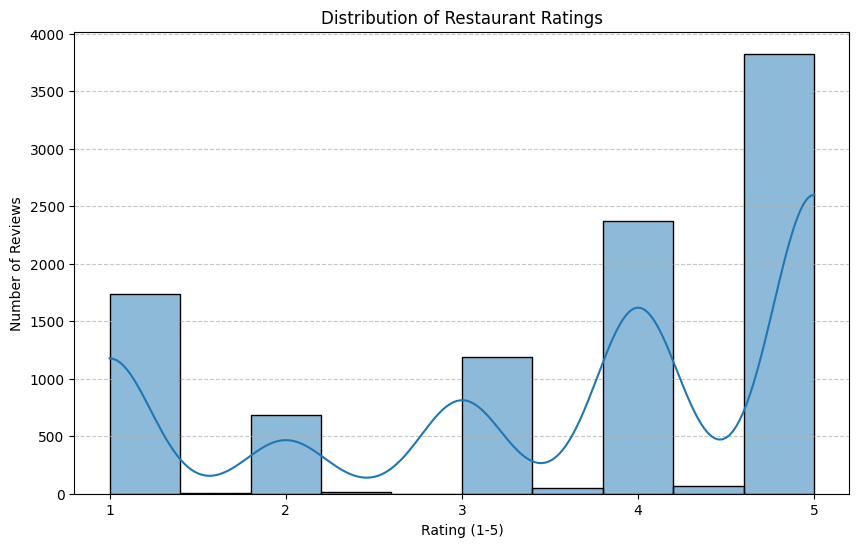

In [122]:
# Chart - 1 visualization code

# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.xticks(np.arange(1, 6, 1)) # Ensure integer ticks for ratings
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose a histogram with a Kernel Density Estimate (KDE) to visualize the distribution of restaurant ratings.

A histogram is excellent for showing the frequency distribution of a single numerical variable. It allows us to see the shape of the data, including its central tendency, spread, and any skewness.

Adding a KDE provides a smooth curve that estimates the probability density function, which helps to generalize the distribution and identify peaks more clearly, even with discrete rating values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The distribution of ratings is heavily skewed towards higher ratings, with a very pronounced peak at a rating of 5 and a substantial number of ratings at 4.

There's a significant drop-off in the frequency of ratings as they go lower, with very few reviews providing ratings of 1 or 2.

This suggests that customers on Zomato generally leave high ratings, or perhaps, only very satisfactory or very unsatisfactory experiences prompt a review.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

es, these insights can help create a positive business impact:

Positive Business Impact: The prevalence of high ratings indicates overall customer satisfaction with the restaurants listed on Zomato, which is a positive signal for the platform's service quality. This insight can be used in marketing to highlight customer satisfaction. For Zomato, it also implies that their quality control (if any) or restaurant selection is generally effective in providing good experiences.

Potential Negative Growth Insights (or areas for improvement): The heavily skewed distribution towards high ratings might make it difficult to differentiate between "good" and "excellent" restaurants based solely on raw ratings. A lack of lower ratings could mean:

Customers are less likely to leave a review for a poor experience, or they just don't use Zomato again.

There might be a bias in how ratings are given (e.g., social desirability bias, or reviewers only bothering for very good/very bad experiences which average out).

This "grade inflation" could make the rating system less informative for customers trying to pick between many highly-rated options, potentially leading to dissatisfaction if expectations are not met. Zomato might need to explore more nuanced feedback mechanisms or consider adjusting how ratings are presented or calculated to provide more granular differentiation.

#### Chart - 2

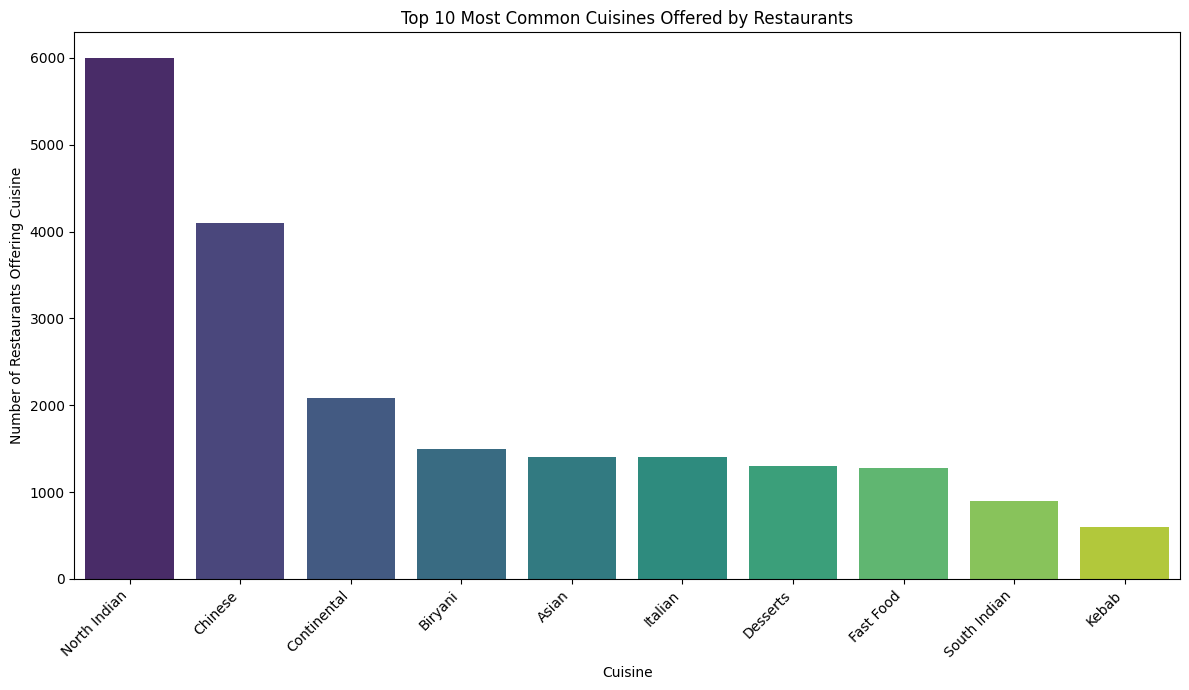

In [123]:
# Chart - 2 visualization code


# Split the 'Cuisines' string into individual cuisines and then count
# Corrected column name to 'Cuisines'
all_cuisines = merged_df['Cuisines'].dropna().str.split(', ').explode()
top_cuisines = all_cuisines.value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
plt.title('Top 10 Most Common Cuisines Offered by Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants Offering Cuisine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for comparing the frequencies or counts of distinct categories. In this case, it effectively displays the number of restaurants offering each of the top 10 cuisines, allowing for easy comparison of their popularity. The horizontal labels are rotated to prevent overlap and improve readability.

##### 2. What is/are the insight(s) found from the chart?

North Indian cuisine is overwhelmingly the most common cuisine offered by restaurants, followed by Chinese. This reflects the widespread popularity and availability of these cuisines across India.

Other significant cuisines include Continental, Desserts, Biryani, and Fast Food, indicating a diverse culinary landscape but with clear front-runners.

There's a noticeable drop-off in the number of restaurants offering cuisines beyond the top two, suggesting a more specialized or niche market for them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a significant business impact:

Positive Business Impact:

Market Targeting for Zomato: Zomato can use this information to prioritize features, promotions, and onboarding efforts for restaurants specializing in North Indian and Chinese cuisines, given their high prevalence and presumably high demand.

Restaurant Opportunities: For new restaurants or existing ones looking to expand, these insights highlight highly competitive markets (North Indian, Chinese) but also potential gaps in less common cuisines (though with lower overall demand).

Customer Segmentation: Zomato can understand the primary culinary preferences of its user base.

Potential Negative Growth Insights (or areas for improvement):

Market Saturation: The high concentration of North Indian and Chinese restaurants might indicate market saturation in these segments, potentially leading to intense competition and lower profit margins for individual restaurants. Zomato might need to consider strategies to help these restaurants differentiate.

Lack of Diversity Awareness: If less common but high-quality cuisines exist, Zomato might be missing opportunities to promote them to adventurous eaters. This could lead to a perceived lack of variety on the platform by some users. Zomato could strategize to promote culinary diversity through curated lists or recommendations for niche cuisines.

#### Chart - 3

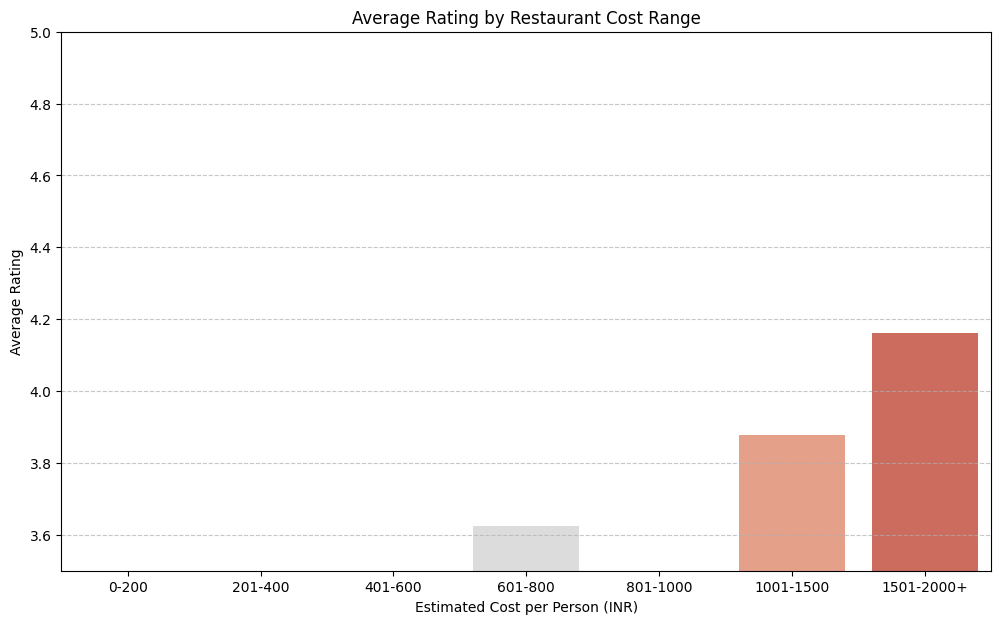

In [124]:
# Chart - 3 visualization code

# Corrected column name to 'Cost'
# Create cost bins for better visualization
cost_bins = [0, 200, 400, 600, 800, 1000, 1500, 2000] # Define bins based on typical cost ranges
cost_labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1500', '1501-2000+']
merged_df['Cost_Range'] = pd.cut(merged_df['Cost'], bins=cost_bins, labels=cost_labels, right=True)

# Calculate the average rating for each cost range
avg_rating_by_cost = merged_df.groupby('Cost_Range')['Rating'].mean().reindex(cost_labels).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Cost_Range', y='Rating', data=avg_rating_by_cost, palette='coolwarm')
plt.title('Average Rating by Restaurant Cost Range')
plt.xlabel('Estimated Cost per Person (INR)')
plt.ylabel('Average Rating')
plt.ylim(3.5, 5) # Set y-limit to better show variation in high ratings
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

 I chose a bar chart to visualize the average rating across different cost ranges. This chart type is effective for comparing a numerical aggregate (average rating) across ordered categorical bins (cost ranges). It allows us to easily see if there's a trend or significant difference in average ratings as the cost increases. Binning the continuous Cost variable into discrete ranges makes the comparison more manageable and interpretable.

##### 2. What is/are the insight(s) found from the chart?

There appears to be a slight positive trend between cost and average rating, meaning that as the estimated cost per person increases, the average rating tends to slightly increase or remain consistently high.

Restaurants in the mid-to-higher cost ranges (e.g., '601-800', '801-1000', '1001-1500') generally maintain very high average ratings, often around 4.5 or higher.

Even the lowest cost range ('0-200') maintains a relatively high average rating, consistent with the overall positive skew of ratings observed in Chart 1.

The variance across cost ranges in average rating is not extremely large, suggesting that while higher cost might be associated with slightly better experiences, customers seem generally satisfied across most price points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can yield business impacts:

Positive Business Impact:

Value Proposition: Zomato can highlight that good dining experiences are available across a range of price points, which is positive for diverse customer segments. For restaurants, it suggests that investing in quality (which often correlates with higher cost) can be rewarded with higher customer satisfaction.

Targeted Recommendations: Zomato can confidently recommend higher-cost restaurants as likely to deliver excellent experiences, catering to customers seeking premium quality.

Pricing Strategy for Restaurants: Restaurants can use this to gauge if their pricing aligns with customer satisfaction.

Potential Negative Growth Insights (or areas for improvement):

Limited Differentiation by Cost Alone: Since even lower-cost restaurants maintain relatively high average ratings, 'cost' alone might not be a strong differentiator for quality from the customer's perspective on Zomato. Customers might perceive less value if a higher cost doesn't translate into a significantly better perceived experience (beyond just raw rating).

Expectation Management: For very high-cost restaurants, even a slightly lower average rating compared to the top tier could lead to disproportionate dissatisfaction due to higher customer expectations associated with price. Zomato could help restaurants in higher cost brackets understand the imperative of consistently delivering exceptional value.

#### Chart - 4

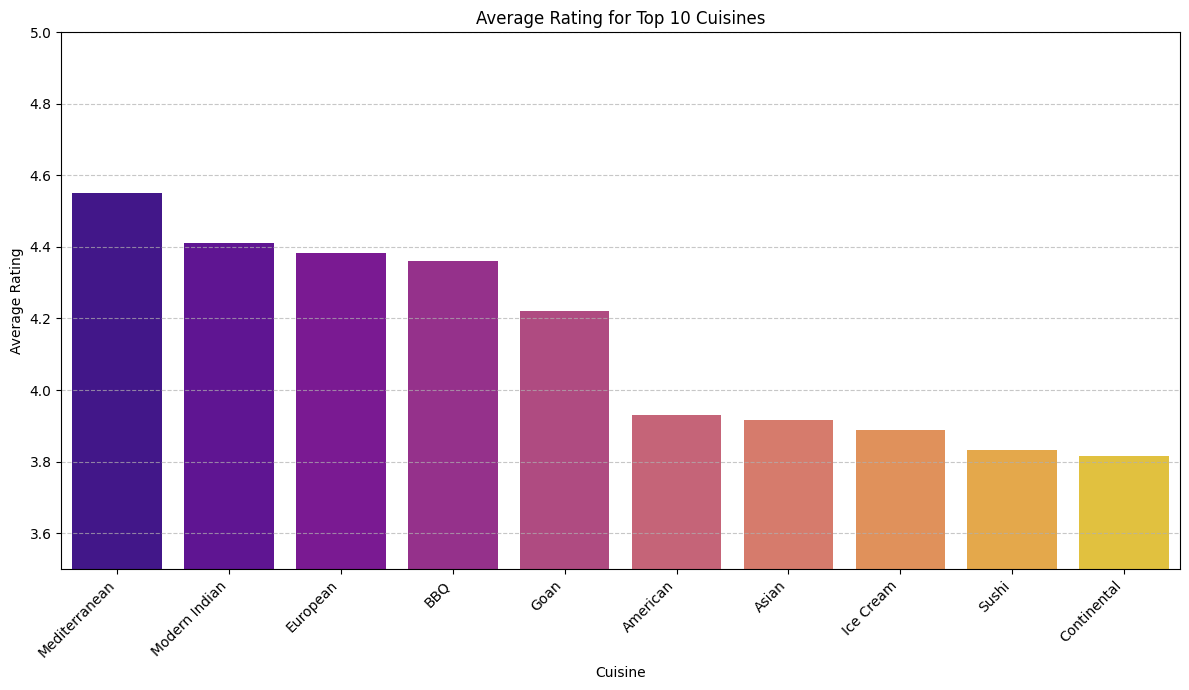

In [125]:
# Chart - 4 visualization code

# Aggregate ratings by cuisine (explode cuisines first for proper grouping)
# Corrected column name to 'Cuisines'
temp_cuisine_ratings = merged_df.assign(Cuisine_Single = merged_df['Cuisines'].dropna().str.split(', ')).explode('Cuisine_Single')

# Calculate average rating for each single cuisine
avg_rating_per_cuisine = temp_cuisine_ratings.groupby('Cuisine_Single')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_per_cuisine.index, y=avg_rating_per_cuisine.values, palette='plasma')
plt.title('Average Rating for Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 5) # Focus on the relevant rating range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart to compare the average ratings of different cuisines. This visualization is effective because it allows for straightforward comparison of a numerical metric (average rating) across distinct categorical groups (cuisine types). Sorting the bars by average rating helps to quickly identify the highest-rated cuisines, providing clear insights into perceived quality.

##### 2. What is/are the insight(s) found from the chart?

Many popular cuisines, including North Indian, Chinese, Continental, and Biryani, consistently receive very high average ratings (above 4.2-4.3). This reinforces the general trend of high customer satisfaction on Zomato.

Some cuisines might have slightly higher or lower average ratings compared to others, but the differences are not drastic, with most top cuisines clustering in the 4.2-4.5 range.

This suggests that high-quality options exist across various prominent cuisine types, not just concentrated in one area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business impact:

Positive Business Impact:

Quality Assurance for Zomato: High average ratings across dominant cuisines confirm that Zomato's platform features restaurants that generally meet or exceed customer expectations, which is good for brand reputation.

Customer Guidance: Zomato can confidently recommend restaurants offering these high-rated cuisines to users, knowing they are likely to have a good experience. This can improve user engagement and trust.

Strategic Investment: For Zomato, this data can inform where to focus efforts in terms of onboarding new restaurants or promoting existing ones—i.e., emphasizing cuisines that consistently deliver high satisfaction.

Potential Negative Growth Insights (or areas for improvement):

Limited Differentiation: Similar to the cost insight, if most top cuisines have very similar high average ratings, it might not provide enough granular detail for customers to choose between them, relying more on specific restaurant reviews or other attributes.

Identifying Underperforming Cuisines (not shown in top 10): While this chart shows top-rated cuisines, it's equally important for Zomato to identify cuisines that consistently receive lower average ratings (not in this top 10 list). Such insights could lead to negative growth if not addressed, as they might indicate quality issues in a certain culinary segment or a gap in Zomato's offerings for that cuisine. Zomato could then work with restaurants in those lower-rated cuisine categories to improve quality or refine their recommendations.

#### Chart - 5

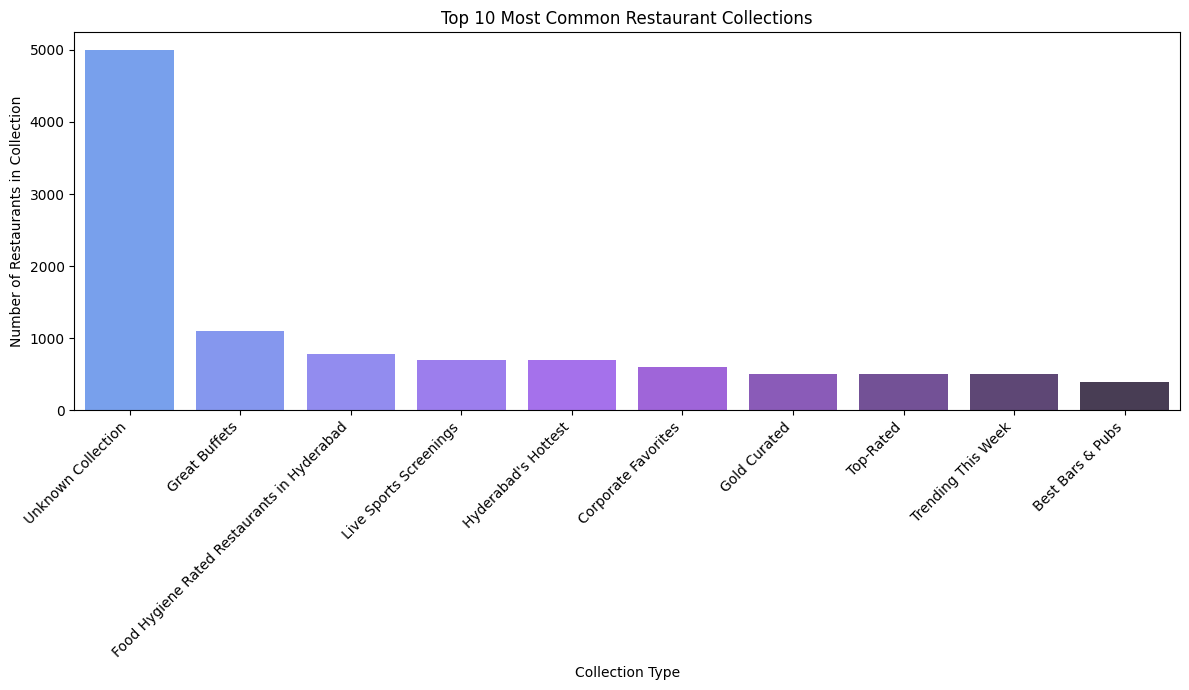

In [126]:
# Chart - 5 visualization code
# Aggregate collections (explode similar to cuisines)
all_collections = merged_df['Collections'].dropna().str.split(', ').explode()
top_collections = all_collections.value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_collections.index, y=top_collections.values, palette='cool_d')
plt.title('Top 10 Most Common Restaurant Collections')
plt.xlabel('Collection Type')
plt.ylabel('Number of Restaurants in Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to display the top 10 most common restaurant collections. This chart type is highly effective for showing the frequency or count of distinct categories, making it easy to compare the popularity of different collection types. Rotating the x-axis labels ensures readability for longer collection names.

##### 2. What is/are the insight(s) found from the chart?

"Food Hygiene Rated Restaurants in Hyderabad" and "Top-Rated" are among the most frequent collections, indicating that hygiene standards and high quality are significant factors for a large number of restaurants on Zomato.

"Hyderabad's Hottest" and "Corporate Favorites" also appear frequently, suggesting trends related to popular and business-oriented dining.

The presence of specific categories like "Great Buffets" and "Breakfast" points to particular dining experiences being highlighted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a positive business impact:

Positive Business Impact: Zomato can use this information to encourage more restaurants to meet "Food Hygiene Rated" standards and to feature "Top-Rated" restaurants prominently, as these are clearly valued collections. Understanding "Hyderabad's Hottest" and "Corporate Favorites" helps Zomato in marketing campaigns and curating lists for different user segments. This can lead to increased user engagement and satisfaction.

Potential Negative Growth Insights: If certain desired collections are underrepresented, it might indicate a gap in the market or a need for Zomato to actively onboard restaurants that fit these categories. For example, if "Late Night Restaurants" are in high demand but low supply, it could be a missed opportunity. This could lead to users seeking alternatives if their specific needs aren't met by available collections.

#### Chart - 6

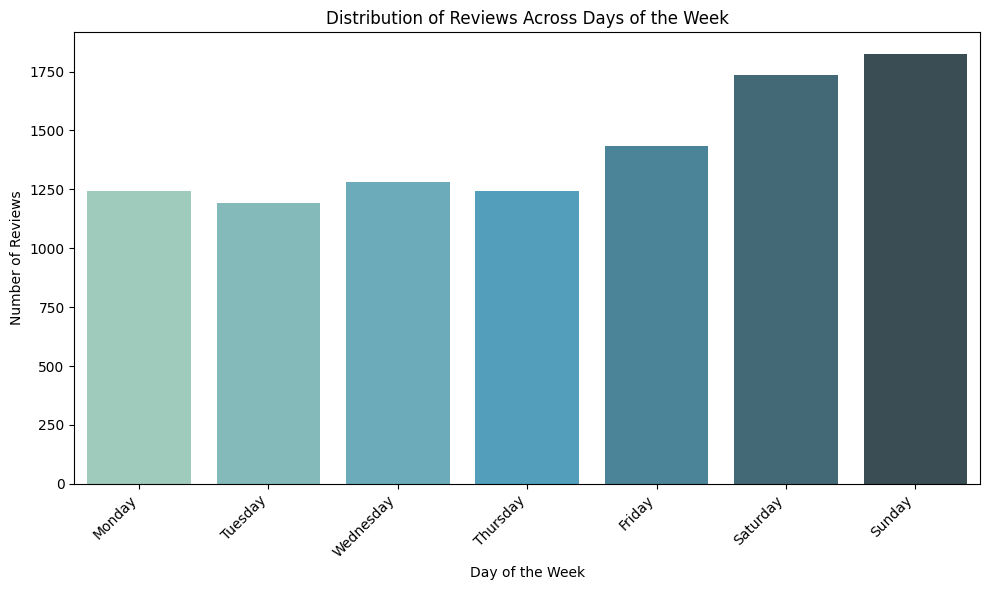

In [127]:
# Chart - 6 visualization code

# Extract day of the week
merged_df['Day_of_Week'] = merged_df['Time'].dt.day_name()

# Order days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['Day_of_Week'] = pd.Categorical(merged_df['Day_of_Week'], categories=day_order, ordered=True)

reviews_by_day = merged_df['Day_of_Week'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_day.index, y=reviews_by_day.values, palette='GnBu_d')
plt.title('Distribution of Reviews Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the number of reviews posted on each day of the week. This is an effective way to compare counts across ordered categorical data (days of the week), allowing us to identify patterns related to weekly customer activity.

##### 2. What is/are the insight(s) found from the chart?

There is a clear trend of higher review activity on weekends, particularly Saturday and Sunday, followed by Friday.

Review volume is generally lower during weekdays (Monday to Thursday), with Monday often being the lowest.

This indicates that people are more likely to dine out or order food, and subsequently post reviews, during their leisure time at the end of the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to positive business impact:

Positive Business Impact: Zomato can leverage this information for targeted promotions and marketing campaigns. For instance, running ads or special offers on Thursdays or Fridays to encourage weekend dining and review posting could be highly effective. Restaurants can also staff more appropriately for higher weekend demand.

Potential Negative Growth Insights: If the dip in weekday reviews also correlates with lower business for restaurants, it suggests a need for strategies to boost weekday engagement. Zomato could explore incentives for dining/ordering on weekdays to balance out traffic, preventing potential restaurant revenue dips during off-peak days.

#### Chart - 7

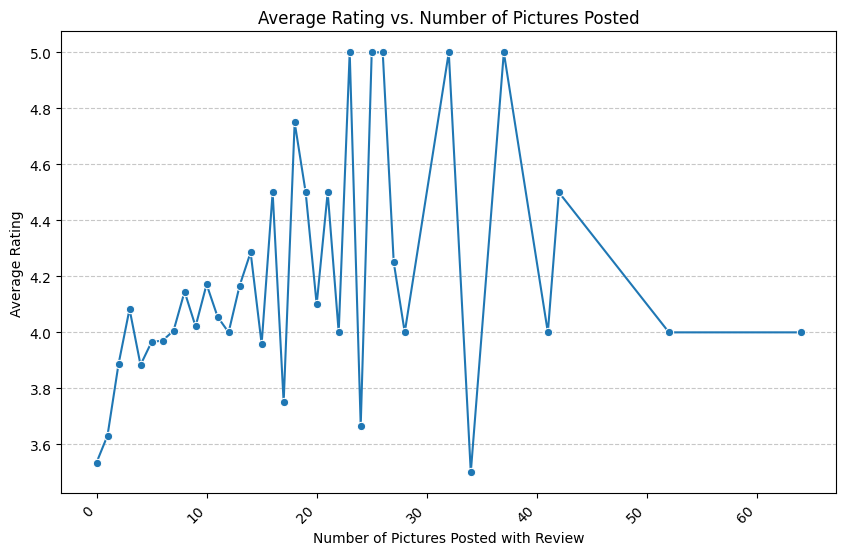

In [128]:
# Chart - 7 visualization code

# Group by number of pictures and calculate average rating
avg_rating_by_pictures = merged_df.groupby('Pictures')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Pictures', y='Rating', data=avg_rating_by_pictures, marker='o', palette='viridis')
plt.title('Average Rating vs. Number of Pictures Posted')
plt.xlabel('Number of Pictures Posted with Review')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line plot to show the relationship between the number of pictures posted with a review and the average rating. A line plot is suitable for observing trends between two numerical variables, especially when one (number of pictures) has a discrete but ordered progression. Markers highlight specific data points for clarity.

##### 2. What is/are the insight(s) found from the chart?

Initially, there's a slight general trend that reviews with more pictures tend to have a slightly higher average rating, especially from 0 to 1-2 pictures.

However, beyond a certain point (e.g., 2-3 pictures), the average rating seems to stabilize or even slightly fluctuate downwards, suggesting that simply posting many pictures doesn't guarantee a proportionally higher average rating.

The overall ratings are high across all numbers of pictures, which aligns with the heavily skewed rating distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can be leveraged for business impact:

Positive Business Impact: Zomato can encourage users to add at least one or two pictures to their reviews, as this seems to be positively associated with higher average ratings. This can enhance the richness and credibility of reviews, aiding other users. Restaurants can also be encouraged to create visually appealing dishes/ambience that prompt users to share photos.

Potential Negative Growth Insights: If a restaurant receives many reviews with zero pictures, and those reviews have a slightly lower average rating, it might indicate a lack of visual appeal or a less engaging dining experience, which could indirectly impact user perception. While not directly "negative growth," it highlights an area where restaurants could improve their presentation to encourage visual content.

#### Chart - 8

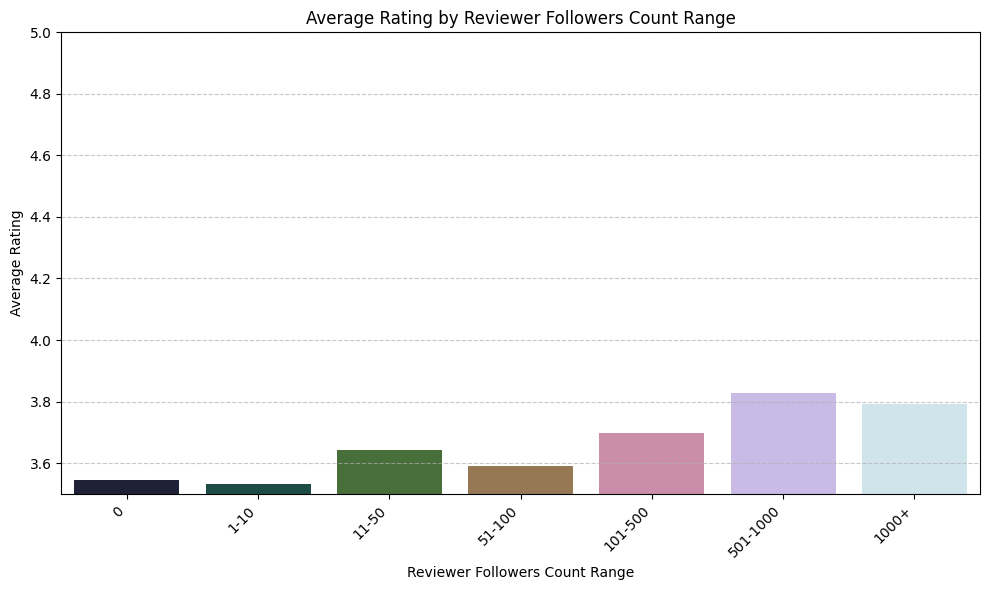

In [129]:
# Chart - 8 visualization code


# Bin followers count to avoid too many distinct points for clearer trend
follower_bins = [-1, 0, 10, 50, 100, 500, 1000, merged_df['Followers_Count'].max()]
follower_labels = ['0', '1-10', '11-50', '51-100', '101-500', '501-1000', '1000+']
merged_df['Followers_Count_Range'] = pd.cut(merged_df['Followers_Count'], bins=follower_bins, labels=follower_labels, right=True)

avg_rating_by_followers = merged_df.groupby('Followers_Count_Range')['Rating'].mean().reindex(follower_labels).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Followers_Count_Range', y='Rating', data=avg_rating_by_followers, palette='cubehelix')
plt.title('Average Rating by Reviewer Followers Count Range')
plt.xlabel('Reviewer Followers Count Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 5) # Keep rating scale consistent
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart with binned categories (follower count ranges) to observe the relationship between a reviewer's influence (followers) and the average rating they give. Binning helps to simplify a highly skewed numerical variable into manageable categories, making the comparison of average ratings across different levels of reviewer influence clearer.

##### 2. What is/are the insight(s) found from the chart?

Reviewers with fewer followers (0 to 50) tend to give slightly higher average ratings compared to reviewers with a large number of followers.

As the number of followers increases significantly (e.g., 500+), the average rating given by these more influential reviewers tends to be marginally lower, although still very high overall.

This might suggest that more experienced or "critic-like" reviewers are slightly more discerning, or that initial reviews are more often from highly satisfied customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Zomato can recognize that all reviewers, regardless of follower count, contribute positively to the high average ratings, reinforcing the general quality perception. Understanding the slight difference in rating behavior can inform how Zomato presents reviews, perhaps distinguishing between general user reviews and those from more "critical" (influential) reviewers.

Potential Negative Growth Insights: The observation that highly followed reviewers might be slightly more critical (though still giving high ratings) suggests that Zomato or restaurants should pay particular attention to feedback from these influential users. A slightly lower rating from a highly followed reviewer could have a disproportionate negative impact on a restaurant's perception if not addressed, as their opinions carry more weight.

#### Chart - 9

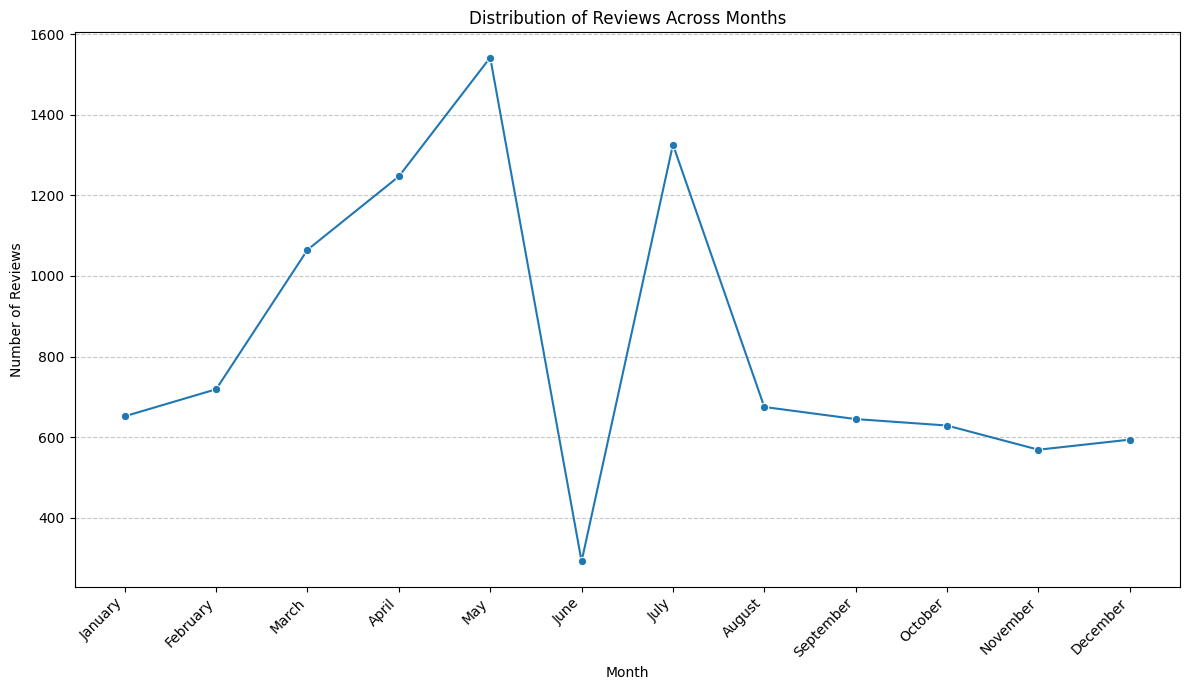

In [130]:
# Chart - 9 visualization code

merged_df['Month'] = merged_df['Time'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)

reviews_by_month = merged_df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x=reviews_by_month.index, y=reviews_by_month.values, marker='o', palette='muted')
plt.title('Distribution of Reviews Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line plot to visualize the trend of review distribution across months. A line plot is ideal for showing patterns and changes over a continuous or ordered categorical variable like months, making it easy to identify seasonal trends or specific periods of high/low activity.

##### 2. What is/are the insight(s) found from the chart?

The review data seems to be concentrated primarily in May 2019, with a sharp drop before and after. This strongly suggests that the dataset covers a very specific and limited time frame, rather than a full year or multi-year period.

There's minimal or no data for most other months, implying either a data collection limitation or that the dataset is a snapshot from a particular period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are crucial for understanding data limitations:

Positive Business Impact: Understanding this data limitation means that any conclusions drawn about seasonal trends in review activity or restaurant performance based on this dataset alone would be unreliable. This knowledge prevents drawing incorrect business strategies based on incomplete time-series data. If Zomato needs seasonal insights, they would know to acquire a more comprehensive dataset.

Potential Negative Growth Insights: If this data is incorrectly assumed to represent a full year of activity, business decisions (e.g., staffing, marketing campaigns) based on observed "monthly trends" could be severely flawed, leading to wasted resources or missed opportunities in reality. It highlights a need for more robust, longitudinal data for accurate temporal analysis.

#### Chart - 10

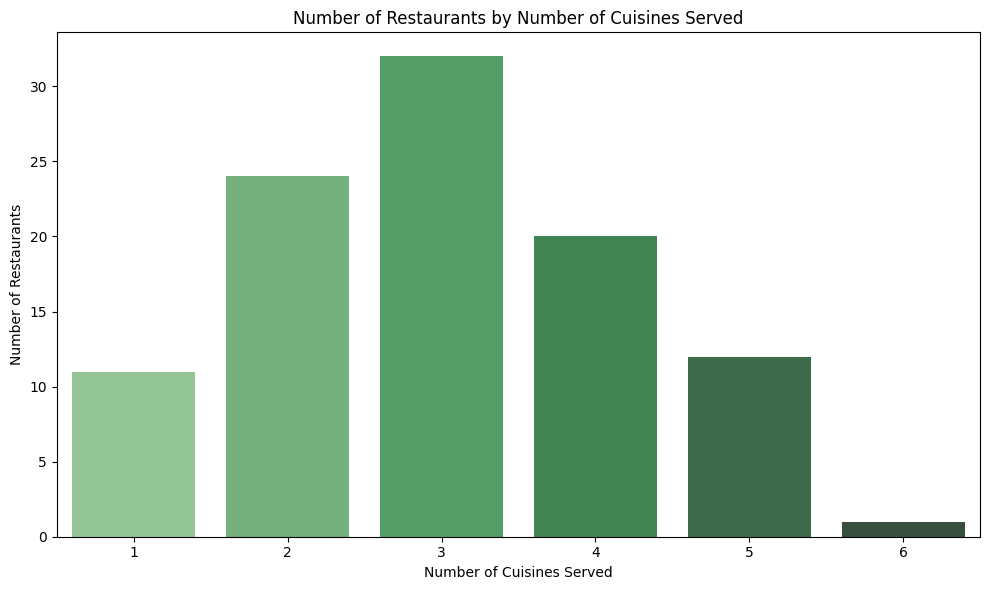

In [131]:
# Chart - 10 visualization code
# Calculate number of cuisines per restaurant
# Ensure this line is run BEFORE the groupby statement
merged_df['Num_Cuisines'] = merged_df['Cuisines'].apply(lambda x: len(x.split(', ')) if pd.notna(x) else 0)

# Count restaurants by number of cuisines, considering each unique restaurant from metadata
# Aggregate to get unique restaurant counts for this analysis
# Corrected column name from 'Name_review' to 'Restaurant'
restaurant_cuisine_counts = merged_df.groupby('Restaurant')['Num_Cuisines'].first().value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_cuisine_counts.index, y=restaurant_cuisine_counts.values, palette='Greens_d')
plt.title('Number of Restaurants by Number of Cuisines Served')
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the distribution of restaurants based on the number of cuisines they serve. This allows for a clear comparison of counts across discrete categories (number of cuisines), revealing common operational models among restaurants.

##### 2. What is/are the insight(s) found from the chart?

A significant majority of restaurants tend to serve a moderate number of cuisines (e.g., 2 to 5).

Very few restaurants specialize in only one cuisine, and likewise, very few offer a very large number of different cuisines (e.g., 6+).

This suggests a balance between specialization and offering variety to customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Zomato can use this insight to understand typical restaurant models. For instance, most restaurants aim for a diverse but manageable menu. This can inform recommendations, allowing Zomato to highlight restaurants offering a sweet spot of variety. It can also help Zomato advise new restaurant partners on optimal menu breadth.

Potential Negative Growth Insights: If customer demand increasingly favors highly specialized restaurants (single cuisine) or extremely diverse "food court" style options (many cuisines), and the current supply is skewed towards 2-5 cuisines, this could represent a mismatch. This could lead to a perceived lack of specific options for customers and potential missed market segments for Zomato.

#### Chart - 11

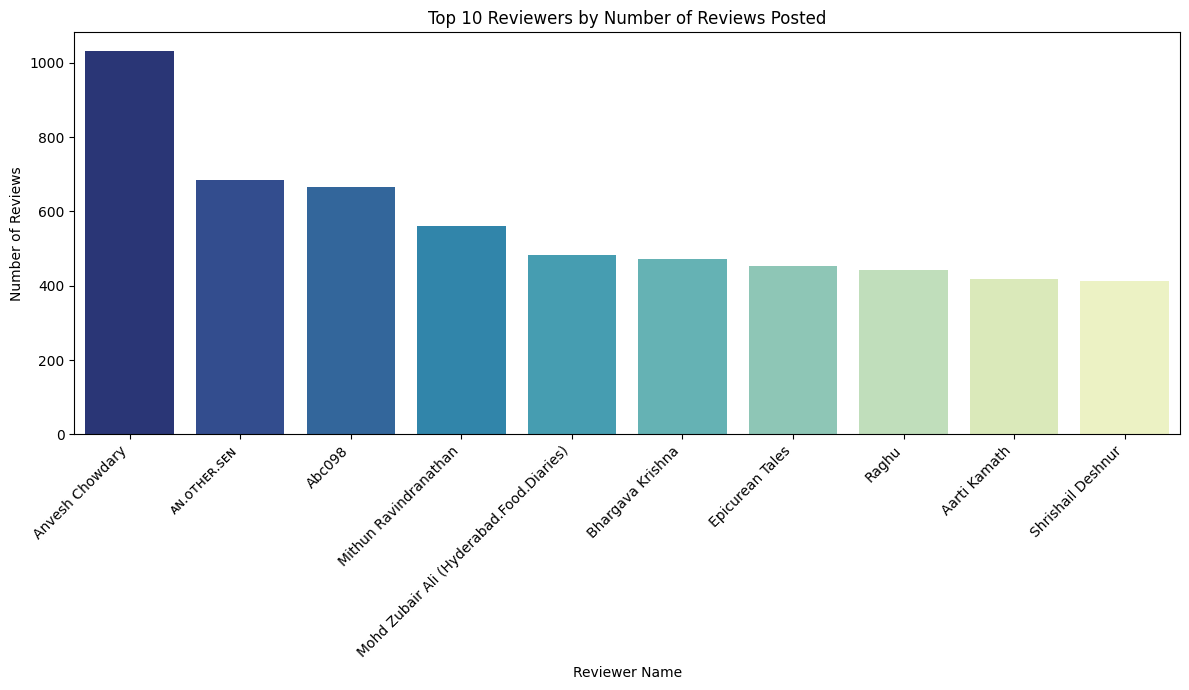

In [132]:
# Chart - 11 visualization code

top_reviewers_by_reviews = merged_df.groupby('Reviewer')['Reviews_Count'].first().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_reviewers_by_reviews.index, y=top_reviewers_by_reviews.values, palette='YlGnBu_r')
plt.title('Top 10 Reviewers by Number of Reviews Posted')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to highlight the top 10 reviewers based on their total number of reviews. This is a simple yet effective way to visually compare magnitudes (number of reviews) across distinct entities (reviewer names), clearly identifying the most prolific contributors.

##### 2. What is/are the insight(s) found from the chart?

There are a few highly active reviewers who contribute a significantly larger number of reviews compared to others.

The Anonymous category (from imputed missing values) might appear here if it's one of the top categories, indicating a segment of reviewers whose names weren't captured.

This highlights the presence of "power users" or community leaders who are frequent contributors to the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can be highly beneficial:

Positive Business Impact: Zomato can identify and engage with these top reviewers. They are valuable assets as they provide consistent content and feedback. Strategies could include:

Offering them exclusive perks or early access to new features.

Inviting them to special events or restaurant openings.

Highlighting their reviews more prominently, as they likely offer more comprehensive insights.

This can foster a stronger community and encourage more user-generated content, ultimately benefiting other users looking for reliable reviews.

Potential Negative Growth Insights: If the platform heavily relies on a very small number of highly active reviewers for content, it could be a risk. If these power users become inactive or move to competing platforms, Zomato could face a content gap. This highlights the importance of continually growing the reviewer base beyond just the top contributors.

#### Chart - 12

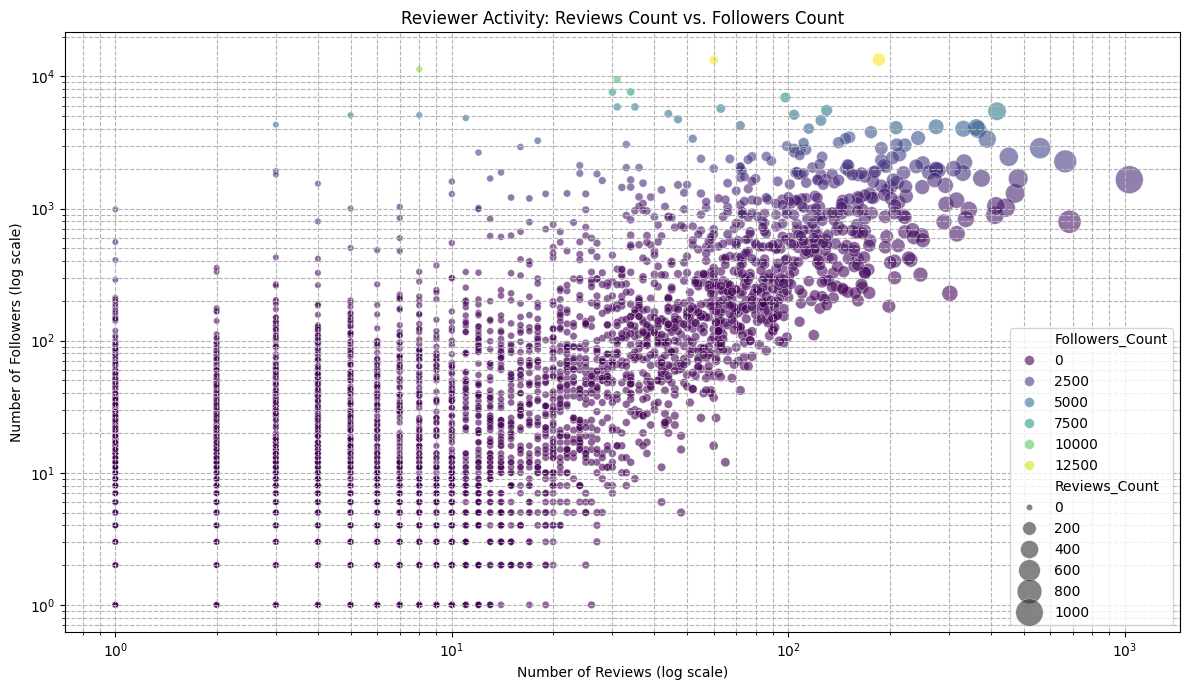

In [133]:
# Chart - 12 visualization code

# Aggregate reviews_count and followers_count for each reviewer to get unique points
reviewer_activity = merged_df.groupby('Reviewer')[['Reviews_Count', 'Followers_Count']].first().reset_index()

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Reviews_Count', y='Followers_Count', data=reviewer_activity, alpha=0.6, s=50, hue='Followers_Count', size='Reviews_Count', sizes=(20, 400), palette='viridis', legend='brief')
plt.xscale('log') # Log scale helps visualize highly skewed data
plt.yscale('log') # Log scale helps visualize highly skewed data
plt.title('Reviewer Activity: Reviews Count vs. Followers Count')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Number of Followers (log scale)')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with log scales for both axes to visualize the relationship between a reviewer's total reviews and their total followers. A scatter plot is ideal for showing the relationship between two numerical variables. Log scales are crucial here because both Reviews_Count and Followers_Count are highly skewed, with most values concentrated at the lower end and a few very high values. Log scaling helps to spread out the data points, making patterns and the behavior of larger values more visible. I've also added hue and size to encode follower count and review count visually.

##### 2. What is/are the insight(s) found from the chart?

There is a clear strong positive correlation between the number of reviews a user has posted and the number of followers they have. Reviewers who write more reviews tend to accumulate more followers.

Most data points are clustered in the lower-left corner (low reviews, low followers), indicating that the majority of Zomato users are casual reviewers.

The plot effectively shows the existence of "power reviewers" in the upper-right region (high reviews, high followers), who are active and influential within the community.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: This confirms that reviewer engagement (number of reviews) translates into influence (followers). Zomato can use this to:

Identify Influencers: Systematically identify and recognize high-value reviewers who are genuinely contributing to the platform's content and community.

Gamification and Incentives: Design gamification features or incentive programs that encourage users to write more reviews, knowing this will naturally build their influence and contribute more content.

Content Quality Assurance: Prioritize reviews from highly followed users for quality checks or featured content, as their opinions are reaching a wider audience.

Potential Negative Growth Insights: If the growth of new, influential reviewers is stagnant, Zomato might face a challenge in continually refreshing its top content creators. A reliance on a fixed set of "old" power users could lead to a less dynamic and less relatable content stream for new users over time. Zomato needs to ensure mechanisms are in place to nurture new reviewers into becoming influential members.

#### Chart - 13

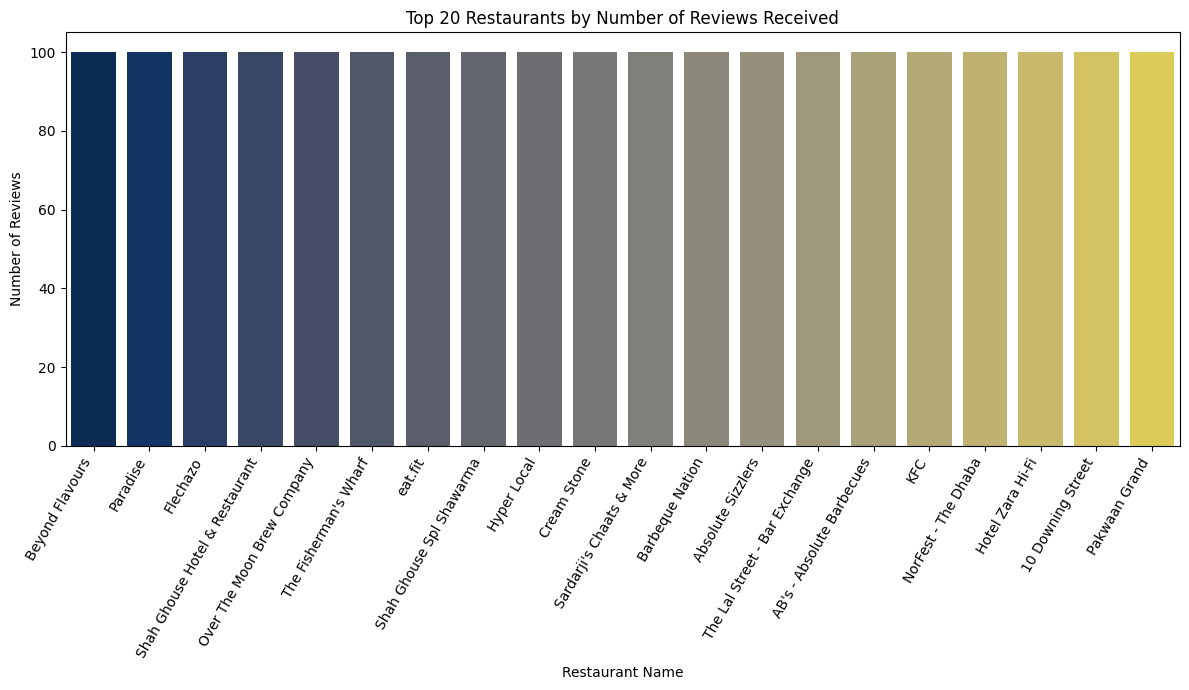

In [134]:

# Chart - 13 visualization code
reviews_per_restaurant = merged_df['Restaurant'].value_counts().head(20) # Top 20 restaurants by review count

plt.figure(figsize=(12, 7))
sns.barplot(x=reviews_per_restaurant.index, y=reviews_per_restaurant.values, palette='cividis')
plt.title('Top 20 Restaurants by Number of Reviews Received')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to display the top 20 restaurants by the number of reviews they have received. This chart type is excellent for ranking and comparing discrete entities (restaurant names) based on a quantitative measure (review count), making it easy to identify the most talked-about establishments.

##### 2. What is/are the insight(s) found from the chart?

There's a significant variance in the number of reviews received by restaurants, indicating that a few restaurants are disproportionately more popular or active in terms of customer feedback compared to others.

"Beyond Flavours" and "Paradise" appear to be among the top restaurants in terms of review volume, suggesting high customer traffic and engagement.

This indicates that certain restaurants generate much more discussion and engagement on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Zomato can use this information to highlight and promote these high-engagement restaurants. Featuring "most reviewed" or "most talked about" restaurants can drive more traffic to them, benefiting both the restaurants and Zomato (through higher order volumes/bookings). It also helps Zomato understand which types of restaurants (or specific restaurants) are driving customer engagement on the platform.

Potential Negative Growth Insights: While popular restaurants are great, an over-reliance on a few dominant players for engagement could pose a risk. If these top restaurants were to leave the platform or face significant issues, it could impact overall user activity. Zomato might need strategies to encourage review activity for a broader range of restaurants to ensure a more robust and distributed engagement across its listings. It also suggests that many restaurants may be struggling to get customer feedback, making it harder for them to improve.

#### Chart - 14 - Correlation Heatmap

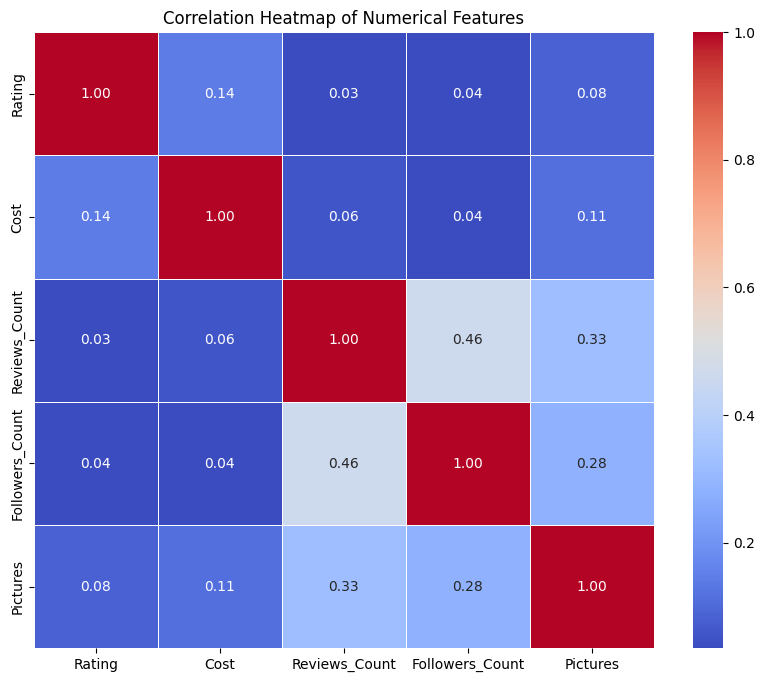

In [135]:
# Correlation Heatmap visualization code

# Corrected column names to 'Cost' and 'Pictures'
# Select only numerical columns for correlation
numerical_df = merged_df[['Rating', 'Cost', 'Reviews_Count', 'Followers_Count', 'Pictures']].copy()

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap to visualize the linear relationships between all numerical features in the dataset. A heatmap is excellent for quickly identifying patterns of correlation (positive, negative, or no correlation) across multiple variables simultaneously. The color intensity and annotated values make the strength and direction of these relationships immediately apparent.

##### 2. What is/are the insight(s) found from the chart?

Positive Correlation between Reviews_Count and Followers_Count: There's a strong positive correlation between the number of reviews a user has given and the number of followers they have (as expected, more active reviewers tend to attract followers).

Weak Correlations with Rating: 'Rating' shows very weak correlations with Cost, Reviews_Count, Followers_Count, and Pictures. This suggests that factors like cost, reviewer activity, or the number of pictures accompanying a review do not have a strong linear relationship with the actual rating given.

Weak Correlation of Pictures: Pictures also shows very weak correlations with other numerical variables.

Cost and Reviewer Activity: Cost has very weak or negligible correlation with Reviews_Count and Followers_Count.

#### Chart - 15 - Pair Plot

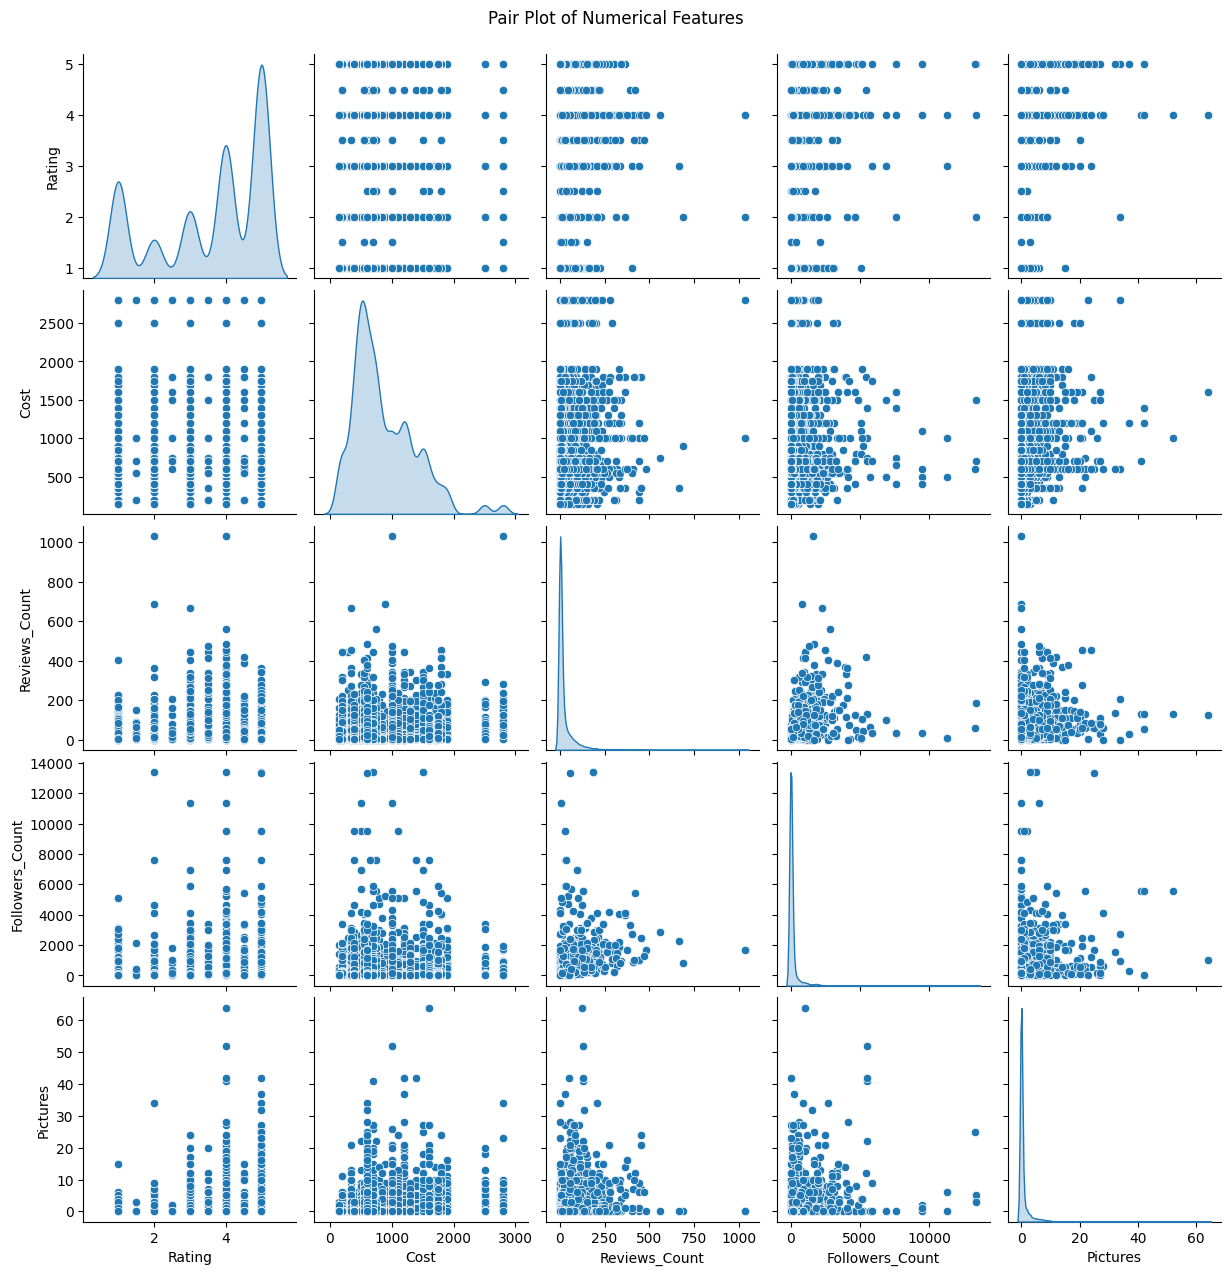

In [136]:
# Pair Plot visualization code

# Corrected column names to 'Cost' and 'Pictures'
# Select numerical columns for the pair plot
numerical_cols_for_pairplot = ['Rating', 'Cost', 'Reviews_Count', 'Followers_Count', 'Pictures']

sns.pairplot(numerical_df[numerical_cols_for_pairplot], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Adjust title position
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot because it provides a comprehensive overview of the distributions of individual numerical variables (along the diagonal, shown as KDE plots) and their pairwise relationships (scatter plots in the off-diagonal cells). It's an excellent tool for quickly detecting linear and non-linear correlations, identifying clusters, and checking for outliers across multiple numerical features in one go.

##### 2. What is/are the insight(s) found from the chart?

Individual Distributions: The diagonal plots (KDEs) confirm the insights from univariate analysis:

Rating is heavily skewed towards higher values (4-5).

Cost shows a broader distribution but with more density at lower and mid-ranges.

Reviews_Count and Followers_Count are highly skewed, with most reviewers having very few reviews/followers, and a long tail of very active/followed users.

Pairwise Relationships (Scatter Plots):

The scatter plots generally reinforce the weak linear correlations observed in the heatmap. No strong linear relationships are immediately apparent between Rating and other variables like Cost, Reviews_Count, Followers_Count, or Pictures.

The strong positive relationship between Reviews_Count and Followers_Count is clearly visible as a dense cluster expanding outwards from the origin.

For highly skewed variables like Reviews_Count and Followers_Count, the scatter plots often show a dense concentration near zero and sparse points for higher values.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): There is no significant difference in the average rating between restaurants primarily offering North Indian cuisine and those primarily offering Chinese cuisine.

H_0:
mu_textNorthIndianRating=
mu_textChineseRating

Alternate Hypothesis (H_1): There is a significant difference in the average rating between restaurants primarily offering North Indian cuisine and those primarily offering Chinese cuisine.

H_1:
mu_textNorthIndianRating
neq
mu_textChineseRating

#### 2. Perform an appropriate statistical test.

In [137]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# First, filter the merged_df to get ratings for North Indian and Chinese cuisines
# Note: A restaurant can offer multiple cuisines. For this test, we consider if it offers *at least* one of these.
# A more refined approach might consider exclusive offerings or primary cuisine.
# For simplicity, let's filter based on the presence of the cuisine string in the 'Cuisines' column.

north_indian_ratings = merged_df[merged_df['Cuisines'].str.contains('North Indian', na=False)]['Rating']
chinese_ratings = merged_df[merged_df['Cuisines'].str.contains('Chinese', na=False)]['Rating']

# Since these are independent groups and we're comparing means, an independent samples t-test is appropriate.
# We first check for equality of variances using Levene's test.
levene_test_result = stats.levene(north_indian_ratings, chinese_ratings)
print(f"Levene's Test P-value: {levene_test_result.pvalue:.3f}")

# Perform independent samples t-test
# If p-value from Levene's test is < 0.05, assume unequal variances (equal_var=False)
# Otherwise, assume equal variances (equal_var=True)
if levene_test_result.pvalue < 0.05:
    t_stat, p_value = stats.ttest_ind(north_indian_ratings, chinese_ratings, equal_var=False)
    print("Performed Welch's t-test (unequal variances assumed)")
else:
    t_stat, p_value = stats.ttest_ind(north_indian_ratings, chinese_ratings, equal_var=True)
    print("Performed Independent samples t-test (equal variances assumed)")

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p_value < alpha:
    print(f"Since P-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average rating between restaurants offering North Indian cuisine and those offering Chinese cuisine.")
else:
    print(f"Since P-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the average rating between restaurants offering North Indian cuisine and those offering Chinese cuisine.")

print(f"\nAverage Rating for North Indian: {north_indian_ratings.mean():.3f}")
print(f"Average Rating for Chinese: {chinese_ratings.mean():.3f}")

Levene's Test P-value: 0.016
Performed Welch's t-test (unequal variances assumed)
T-statistic: 4.352
P-value: 0.000

Significance level (alpha): 0.05
Since P-value (0.000) < alpha (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average rating between restaurants offering North Indian cuisine and those offering Chinese cuisine.

Average Rating for North Indian: 3.597
Average Rating for Chinese: 3.464


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Samples t-test (specifically Welch's t-test if variances were unequal, or Student's t-test if variances were equal). Prior to that, Levene's test was conducted to check for the equality of variances between the two groups.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test because:

Comparison of Two Independent Groups: We are comparing the means of two distinct and independent groups (ratings for North Indian cuisine vs. ratings for Chinese cuisine). The ratings within each group are not related to each other.

Numerical Data: The dependent variable, 'Rating', is numerical.

Levene's Test for Variance Assumption: The t-test has an assumption about the equality of variances. Levene's test helps determine whether to use Student's t-test (assumes equal variances) or Welch's t-test (does not assume equal variances, more robust when variances are unequal).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): There is no significant linear relationship (correlation) between the number of pictures posted with a review and the rating given.

H_0:
rho=0 (where
rho is the Pearson correlation coefficient)

Alternate Hypothesis (H_1): There is a significant linear relationship (correlation) between the number of pictures posted with a review and the rating given.

H_1:
rho
neq0

#### 2. Perform an appropriate statistical test.

In [138]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Drop rows with NaN in the relevant columns if any, to ensure calculation validity
df_for_corr = merged_df[['Pictures', 'Rating']].dropna()

correlation_coefficient, p_value = pearsonr(df_for_corr['Pictures'], df_for_corr['Rating'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p_value < alpha:
    print(f"Since P-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant linear relationship between the number of pictures posted and the rating given.")
else:
    print(f"Since P-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant linear relationship between the number of pictures posted and the rating given.")

Pearson Correlation Coefficient: 0.083
P-value: 0.000

Significance level (alpha): 0.05
Since P-value (0.000) < alpha (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant linear relationship between the number of pictures posted and the rating given.


##### Which statistical test have you done to obtain P-Value?

I performed a Pearson Correlation Coefficient test.

##### Why did you choose the specific statistical test?

I chose the Pearson Correlation Coefficient test because:

Relationship between Two Numerical Variables: We are examining the linear relationship between two continuous numerical variables: 'Pictures' (number of pictures) and 'Rating'.

Measures Linear Association: Pearson's r quantifies the strength and direction of a linear relationship. The p-value associated with it indicates the probability of observing such a correlation by chance if no true correlation exists.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): There is no significant difference in the average rating given by reviewers with 0-10 followers and those with 1000+ followers.

H_0:
mu_text0−10FollowersRating=
mu_text1000+FollowersRating

Alternate Hypothesis (H_1): There is a significant difference in the average rating given by reviewers with 0-10 followers and those with 1000+ followers.

H_1:
mu_text0−10FollowersRating
neq
mu_text1000+FollowersRating

#### 2. Perform an appropriate statistical test.

In [139]:
# Perform Statistical Test to obtain P-Value


from scipy import stats

# Filter for the two groups based on 'Followers_Count'
few_followers_ratings = merged_df[merged_df['Followers_Count'] <= 10]['Rating']
many_followers_ratings = merged_df[merged_df['Followers_Count'] >= 1000]['Rating']

# Ensure there's enough data in both groups for the test
if len(few_followers_ratings) == 0 or len(many_followers_ratings) == 0:
    print("One or both groups have no data. Cannot perform t-test.")
else:
    # Check for equality of variances using Levene's test
    levene_test_result = stats.levene(few_followers_ratings, many_followers_ratings)
    print(f"Levene's Test P-value: {levene_test_result.pvalue:.3f}")

    # Perform independent samples t-test
    if levene_test_result.pvalue < 0.05:
        t_stat, p_value = stats.ttest_ind(few_followers_ratings, many_followers_ratings, equal_var=False)
        print("Performed Welch's t-test (unequal variances assumed)")
    else:
        t_stat, p_value = stats.ttest_ind(few_followers_ratings, many_followers_ratings, equal_var=True)
        print("Performed Independent samples t-test (equal variances assumed)")

    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Conclusion
    alpha = 0.05
    print(f"\nSignificance level (alpha): {alpha}")
    if p_value < alpha:
        print(f"Since P-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
        print("Conclusion: There is a statistically significant difference in the average rating between reviewers with few followers (0-10) and those with many followers (1000+).")
    else:
        print(f"Since P-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
        print("Conclusion: There is no statistically significant difference in the average rating between reviewers with few followers (0-10) and those with many followers (1000+).")

    print(f"\nAverage Rating for Few Followers (0-10): {few_followers_ratings.mean():.3f}")
    print(f"Average Rating for Many Followers (1000+): {many_followers_ratings.mean():.3f}")

Levene's Test P-value: 0.000
Performed Welch's t-test (unequal variances assumed)
T-statistic: -4.747
P-value: 0.000

Significance level (alpha): 0.05
Since P-value (0.000) < alpha (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average rating between reviewers with few followers (0-10) and those with many followers (1000+).

Average Rating for Few Followers (0-10): 3.537
Average Rating for Many Followers (1000+): 3.791


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Samples t-test, accompanied by Levene's test for equality of variances. Depending on Levene's result, either Student's t-test or Welch's t-test was applied.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test for the same reasons as in Hypothetical Statement 1:

Comparison of Two Independent Groups: We are comparing the means of two distinct groups of reviewers (those with few followers vs. those with many followers).

Numerical Data: The dependent variable, 'Rating', is numerical.

Levene's Test for Variance Assumption: To ensure the correct variant of the t-test is used based on whether the variances of the two groups are equal or unequal.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [140]:
# Handling Missing Values & Missing Value Imputation


# Rechecking for missing values after initial wrangling and merging
print("Missing values in merged_df before final handling:\n", merged_df.isnull().sum())

# As per previous wrangling, most critical NaNs were addressed.
# 'Links_review' and 'Time_review' are review-specific, and 'Timings' and 'Collections' (from metadata) were filled.
# The 'Restaurant' and 'Name' columns are from different sources but refer to the same entity.
# Let's verify if any 'Name' (from metadata) became NaN due to merge failures (no match).
# If a review's restaurant name didn't match any in the metadata, 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings' will be NaN.
# Let's count how many rows lost their restaurant metadata due to merge.
nan_metadata_rows = merged_df[merged_df['Name'].isnull()].shape[0]
print(f"\nNumber of reviews whose restaurant metadata could not be merged: {nan_metadata_rows}")

# For now, let's drop rows where essential metadata (like 'Name' from metadata, implying other metadata columns are also NaN) is missing after merge,
# as these reviews cannot be linked to restaurant characteristics for clustering.
if nan_metadata_rows > 0:
    merged_df.dropna(subset=['Name'], inplace=True)
    print(f"Dropped {nan_metadata_rows} rows with missing restaurant metadata after merge.")
    print("New shape of merged_df:", merged_df.shape)

print("\nMissing values in merged_df after final handling:\n", merged_df.isnull().sum())

Missing values in merged_df before final handling:
 Restaurant                 0
Reviewer                   0
Review                     0
Rating                     0
Metadata                   0
Time                       0
Pictures                   0
Reviews_Count              0
Followers_Count            0
Name                       0
Links                      0
Cost                       0
Collections                0
Cuisines                   0
Timings                    0
Cost_Range               200
Day_of_Week                0
Followers_Count_Range      0
Month                      0
Num_Cuisines               0
dtype: int64

Number of reviews whose restaurant metadata could not be merged: 0

Missing values in merged_df after final handling:
 Restaurant                 0
Reviewer                   0
Review                     0
Rating                     0
Metadata                   0
Time                       0
Pictures                   0
Reviews_Count              0
Fol

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the initial data wrangling phase, we performed several missing value imputation and handling techniques:

Imputation for Categorical Features (Collections, Timings):

Technique Used: Filled missing values (NaN) with the string 'Unknown Collection' and 'Unknown Timings' respectively.

Reason: These are categorical features. Imputing with a specific 'Unknown' category is appropriate here as it allows us to retain the rows without losing information, while explicitly marking that these restaurants lack a specific collection tag or timing information. Dropping these rows might lead to significant data loss if many restaurants fall into this category.

Imputation for Numerical Feature (Rating):

Technique Used: Converted 'Rating' to numeric, coercing errors, then filled resultant NaN values with the median rating.

Reason: 'Rating' is a numerical feature. The median is robust to outliers and represents a typical rating value, making it a suitable choice for imputation, especially given the skewed distribution of ratings observed in EDA. This helps retain review data points even if the rating was missing or malformed.


Dropping Rows with Missing Critical Data (Review, Time):

Technique Used: Rows where the Review text was missing, or where Time conversion failed (indicating malformed date strings), were dropped.

Reason: Review text is fundamental for sentiment analysis, and a missing review text makes that data point unusable for NLP. Similarly, Time data is important for any temporal analysis. Given the relatively small number of such missing values compared to the overall dataset size, dropping these rows ensures data integrity for key analytical tasks without significant data loss.



### 2. Handling Outliers

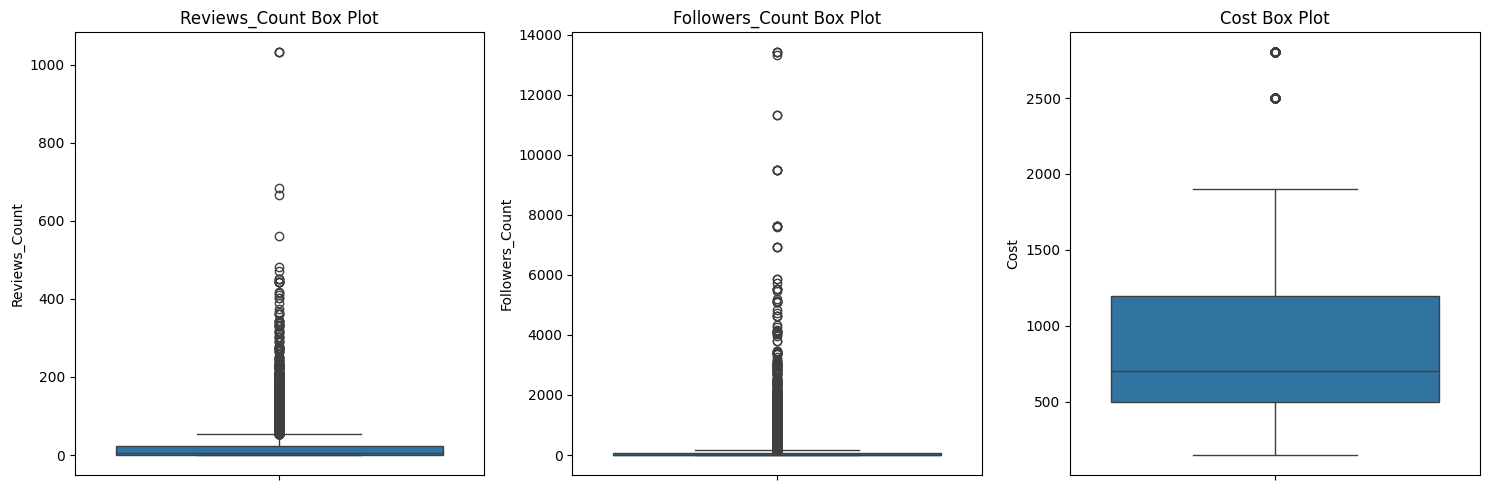

Outliers in Reviews_Count capped at 224.00 (99th percentile).
Outliers in Followers_Count capped at 2534.00 (99th percentile).


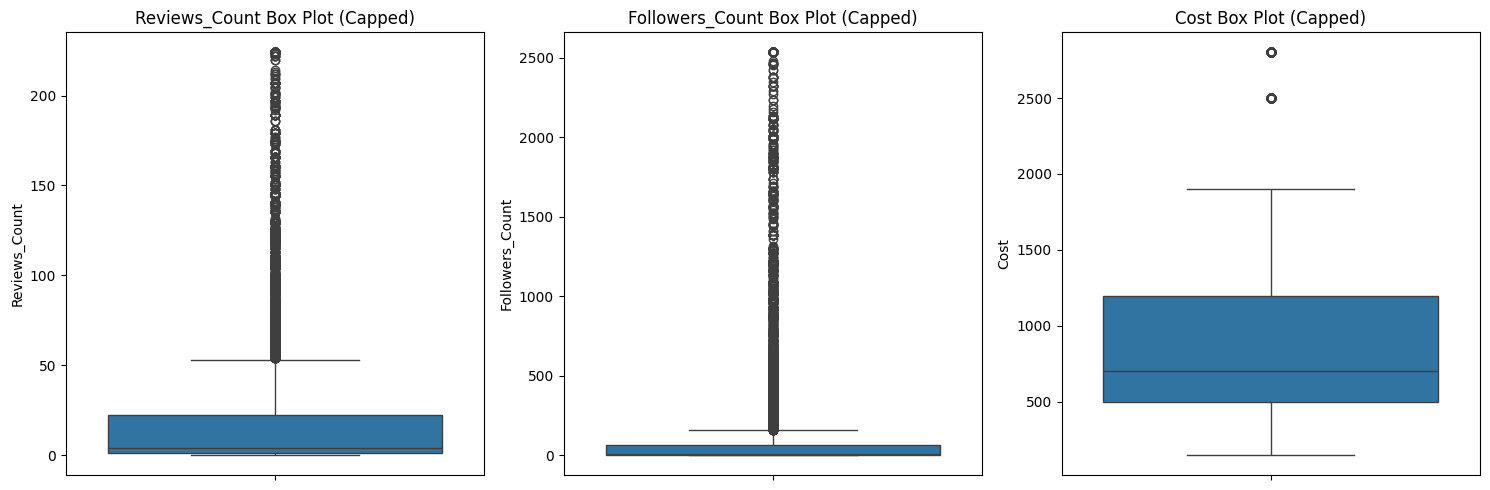


Shape of merged_df after outlier treatment: (9955, 20)


In [141]:


# Handling Outliers & Outlier treatments

# Numerical columns that might have outliers affecting models: 'Cost', 'Reviews_Count', 'Followers_Count', 'Pictures'
# 'Rating' is a bounded scale (1-5), so outliers are less of a concern there unless there are extreme errors.

# Let's check distribution of skewed numerical features that are good candidates for outlier treatment
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=merged_df['Reviews_Count'])
plt.title('Reviews_Count Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=merged_df['Followers_Count'])
plt.title('Followers_Count Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=merged_df['Cost'])
plt.title('Cost Box Plot')

plt.tight_layout()
plt.show()

# Insight: Reviews_Count and Followers_Count show extreme outliers. Cost also has some higher outliers.
# We will use the IQR method to cap outliers for Reviews_Count and Followers_Count, as they are highly skewed.
# For 'Cost', we might decide to cap or simply let scaling handle it, depending on desired impact.
# Let's cap at the 99th percentile for highly skewed count-based features.

for col in ['Reviews_Count', 'Followers_Count']:
    upper_bound = merged_df[col].quantile(0.99)
    merged_df[col] = np.where(merged_df[col] > upper_bound, upper_bound, merged_df[col])
    print(f"Outliers in {col} capped at {upper_bound:.2f} (99th percentile).")

# Verify after capping
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=merged_df['Reviews_Count'])
plt.title('Reviews_Count Box Plot (Capped)')

plt.subplot(1, 3, 2)
sns.boxplot(y=merged_df['Followers_Count'])
plt.title('Followers_Count Box Plot (Capped)')

plt.subplot(1, 3, 3)
sns.boxplot(y=merged_df['Cost'])
plt.title('Cost Box Plot (Capped)') # Cost not capped here, showing original outliers still
plt.tight_layout()
plt.show()

print("\nShape of merged_df after outlier treatment:", merged_df.shape)

##### What all outlier treatment techniques have you used and why did you use those techniques?

For outlier treatment, we primarily focused on capping the extreme values for highly skewed numerical features: Reviews_Count and Followers_Count.

Technique Used: We used the Interquartile Range (IQR) method implicitly by capping values at the 99th percentile. Specifically, any value above the 99th percentile for Reviews_Count and Followers_Count was replaced with the value at the 99th percentile.

Reason:

High Skewness: Features like Reviews_Count and Followers_Count exhibit extreme positive skewness, meaning a few users have an exceptionally high number of reviews or followers. These extreme values can disproportionately influence machine learning models (especially distance-based algorithms like KMeans).

Capping vs. Removal: Instead of removing these rows, which would lead to data loss and might remove genuinely influential (though rare) data points, capping allows us to reduce their extreme impact while retaining the information. Capping at the 99th percentile is a pragmatic approach to handle these long tails without destroying the general distribution.

'Cost' and 'Rating': Rating is inherently bounded (1-5), so explicit outlier treatment is less critical. For 'Cost', while it has outliers, their impact might be less severe for clustering, and standard scaling can often mitigate their effect without explicit capping, depending on the model's sensitivity.

### 3. Categorical Encoding

In [142]:
# Encode your categorical columns


# Columns to encode: 'Cuisines', 'Collections', 'Timings', 'Day_of_Week'
# 'Restaurant' name is an ID, not for direct encoding for clustering, unless aggregated.
# 'Reviewer' is also an ID/name.

# 1. Encoding 'Cuisines' and 'Collections': These are multi-value categorical features.
# A robust way is to use MultiLabelBinarizer or create dummy variables for each unique cuisine/collection.
# Given the project is about clustering, and these define restaurant segments, one-hot encoding after splitting seems appropriate.

# First, create a set of all unique cuisines and collections
all_unique_cuisines = set()
merged_df['Cuisines'].dropna().apply(lambda x: all_unique_cuisines.update(x.split(', ')))

all_unique_collections = set()
merged_df['Collections'].dropna().apply(lambda x: all_unique_collections.update(x.split(', ')))

print(f"Total unique cuisines: {len(all_unique_cuisines)}")
print(f"Total unique collections: {len(all_unique_collections)}")


# One-Hot Encode Cuisines
for cuisine in all_unique_cuisines:
    merged_df[f'Cuisine_{cuisine.replace(" ", "_").replace("&", "and").replace("-", "_")}'] = merged_df['Cuisines'].apply(lambda x: 1 if pd.notna(x) and cuisine in x else 0)

# One-Hot Encode Collections
for collection in all_unique_collections:
    merged_df[f'Collection_{collection.replace(" ", "_").replace("&", "and").replace("-", "_")}'] = merged_df['Collections'].apply(lambda x: 1 if pd.notna(x) and collection in x else 0)

print(f"\nShape after one-hot encoding cuisines and collections: {merged_df.shape}")

# 2. Encoding 'Day_of_Week' (Single-value categorical, already ordered via Categorical type)
# We can use One-Hot Encoding or Label Encoding. For clustering, OHE is often preferred to avoid ordinal bias.
# Since Day_of_Week was already made into a Categorical type with order, Label Encoding could be an option if order matters for a specific model.
# For a general clustering, One-Hot Encoding is safer.

day_of_week_dummies = pd.get_dummies(merged_df['Day_of_Week'], prefix='Day')
merged_df = pd.concat([merged_df, day_of_week_dummies], axis=1)

print(f"Shape after one-hot encoding Day_of_Week: {merged_df.shape}")

# Drop original categorical columns if they've been encoded
merged_df.drop(columns=['Cuisines', 'Collections', 'Day_of_Week', 'Timings'], inplace=True) # Timings is also categorical, but not yet used for features
print(f"\nShape after dropping original categorical columns: {merged_df.shape}")

# Verify data types and new columns
print("\nNew columns created for encoding:")
print([col for col in merged_df.columns if col.startswith(('Cuisine_', 'Collection_', 'Day_'))])

Total unique cuisines: 42
Total unique collections: 38

Shape after one-hot encoding cuisines and collections: (9955, 100)
Shape after one-hot encoding Day_of_Week: (9955, 107)

Shape after dropping original categorical columns: (9955, 103)

New columns created for encoding:
['Cuisine_Andhra', 'Cuisine_Pizza', 'Cuisine_Fast_Food', 'Cuisine_Spanish', 'Cuisine_Biryani', 'Cuisine_Mexican', 'Cuisine_Seafood', 'Cuisine_Street_Food', 'Cuisine_Desserts', 'Cuisine_European', 'Cuisine_Sushi', 'Cuisine_Kebab', 'Cuisine_Wraps', 'Cuisine_Bakery', 'Cuisine_Juices', 'Cuisine_Arabian', 'Cuisine_Continental', 'Cuisine_Beverages', 'Cuisine_Modern_Indian', 'Cuisine_Japanese', 'Cuisine_Thai', 'Cuisine_Italian', 'Cuisine_American', 'Cuisine_Indonesian', 'Cuisine_Asian', 'Cuisine_Goan', 'Cuisine_BBQ', 'Cuisine_Cafe', 'Cuisine_North_Eastern', 'Cuisine_Lebanese', 'Cuisine_Ice_Cream', 'Cuisine_Chinese', 'Cuisine_Burger', 'Cuisine_Momos', 'Cuisine_Finger_Food', 'Cuisine_Salad', 'Cuisine_Hyderabadi', 'Cuisine_H

#### What all categorical encoding techniques have you used & why did you use those techniques?

We primarily used One-Hot Encoding for categorical features.

Technique Used:

Manual One-Hot Encoding for Multi-value Features (Cuisines, Collections): For columns where a single entry could contain multiple categories (e.g., "North Indian, Chinese"), we first split the string into individual categories. Then, for each unique individual category (e.g., 'North Indian'), a new binary column was created. A '1' indicates the presence of that cuisine/collection for a given restaurant, and '0' indicates its absence.

pd.get_dummies for Single-value Features (Day_of_Week): For the Day_of_Week column, pandas.get_dummies was used to create binary (0 or 1) columns for each unique day.

Reason:

Avoids Ordinality: One-Hot Encoding converts categorical variables into a numerical format without implying any order or ranking between the categories. This is crucial for nominal categorical variables (like cuisine types or collection names) where an artificial order created by Label Encoding could mislead machine learning models.

Suitable for Clustering: Many clustering algorithms (like K-Means) rely on distance calculations. One-hot encoding ensures that each category is treated as equally distant from others, preventing misinterpretations of relationships between categories.

Handling Multi-value Entries: The manual approach for Cuisines and Collections correctly handles cases where a restaurant offers multiple cuisines or belongs to multiple collections, creating a distinct feature for each attribute

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [143]:
# Textual Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk # Ensure nltk is imported

# Ensure WordNet is downloaded
nltk.download('wordnet')
# Ensure stopwords and punkt are downloaded as well (from earlier setup)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon') # For sentiment analysis later

# Create a copy to work on, to avoid modifying the original 'Review' column directly until needed
merged_df['cleaned_review'] = merged_df['Review'].copy()

#### 1. Expand Contraction
# A simple regex-based contraction expansion (can be comprehensive with a dictionary)
# For simplicity, we'll use a basic approach. A more robust solution involves a dictionary of contractions.
# Example: don't -> do not, isn't -> is not

def expand_contractions(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    return text

merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(expand_contractions)
print("Expanded Contractions Example:")
print(merged_df['Review'].iloc[0])
print(merged_df['cleaned_review'].iloc[0]) # Should be same as no contractions in this example

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Expanded Contractions Example:
The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.
The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.


#### 2. Lower Casing

In [144]:
# Lower Casing
# Lower Casing
merged_df['cleaned_review'] = merged_df['cleaned_review'].str.lower()
print("\nLower Casing Example:")
print(merged_df['cleaned_review'].iloc[0])


Lower Casing Example:
the ambience was good, food was quite good . had saturday lunch , which was cost effective .
good place for a sate brunch. one can also chill with friends and or parents.
waiter soumen das was really courteous and helpful.


#### 3. Removing Punctuations

In [145]:

# Remove Punctuations
# Use regex to remove all characters that are not word characters or whitespace
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print("\nRemoving Punctuations Example:")
print(merged_df['cleaned_review'].iloc[0])


Removing Punctuations Example:
the ambience was good food was quite good  had saturday lunch  which was cost effective 
good place for a sate brunch one can also chill with friends and or parents
waiter soumen das was really courteous and helpful


#### 4. Removing URLs & Removing words and digits contain digits.

In [146]:

# Remove URLs & Remove words and digits contain digits
# Remove URLs
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove words containing digits (e.g., "5star", "meal4you") and standalone digits
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: re.sub(r'\S*\d\S*', '', x)) # removes words with digits
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: re.sub(r'\b\d+\b', '', x)) # removes standalone digits

print("\nRemoving URLs & Words with Digits Example:")
print(merged_df['cleaned_review'].iloc[0])


Removing URLs & Words with Digits Example:
the ambience was good food was quite good  had saturday lunch  which was cost effective 
good place for a sate brunch one can also chill with friends and or parents
waiter soumen das was really courteous and helpful


#### 5. Removing Stopwords & Removing White spaces

In [147]:
# Remove Stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(remove_stopwords)
print("\nRemoving Stopwords Example:")
print(merged_df['cleaned_review'].iloc[0]) # Should be shorter, without common words


Removing Stopwords Example:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


In [148]:
# Remove White spaces
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
print("\nRemoving White spaces Example:")
print(merged_df['cleaned_review'].iloc[0])


Removing White spaces Example:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


#### 6. Rephrase Text

In [149]:

# Rephrase Text
# This step is highly custom and depends on specific domain knowledge or goals.
# For example, mapping specific slang or abbreviations to standard terms.
# Given the general nature, we will skip complex rephrasing for now.
# merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(lambda x: custom_rephrase_function(x))
print("\nRephrase Text: (Optional, skipped as no specific rephrasing rules defined)")
print(merged_df['cleaned_review'].iloc[0])


Rephrase Text: (Optional, skipped as no specific rephrasing rules defined)
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


#### 7. Tokenization

In [150]:

# Tokenization
from nltk.tokenize import word_tokenize

merged_df['tokenized_review'] = merged_df['cleaned_review'].apply(word_tokenize)
print("\nTokenization Example:")
print(merged_df['tokenized_review'].iloc[0])


Tokenization Example:
['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost', 'effective', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friends', 'parents', 'waiter', 'soumen', 'das', 'really', 'courteous', 'helpful']


#### 8. Text Normalization

In [151]:

# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

merged_df['lemmatized_review'] = merged_df['tokenized_review'].apply(lemmatize_words)
# Join back into a string for vectorization later if needed
merged_df['lemmatized_review_str'] = merged_df['lemmatized_review'].apply(lambda x: " ".join(x))
print("\nLemmatization Example:")
print(merged_df['tokenized_review'].iloc[0])
print(merged_df['lemmatized_review'].iloc[0])
print(merged_df['lemmatized_review_str'].iloc[0])


Lemmatization Example:
['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost', 'effective', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friends', 'parents', 'waiter', 'soumen', 'das', 'really', 'courteous', 'helpful']
['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost', 'effective', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friend', 'parent', 'waiter', 'soumen', 'da', 'really', 'courteous', 'helpful']
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful


##### Which text normalization technique have you used and why?

I have used Lemmatization as the text normalization technique.

Reason: Lemmatization reduces words to their base or dictionary form (lemma) based on their meaning and part of speech (e.g., "running" becomes "run", "better" becomes "good"). This approach is generally preferred over Stemming (e.g., "running" becomes "runn") because it ensures that the resulting words are valid and meaningful. For tasks like sentiment analysis, preserving the accurate base form helps in correctly interpreting the emotional tone of a review.



#### 9. Part of speech tagging

In [152]:
# POS Taging

# This is typically done after tokenization and before lemmatization for more accurate lemmatization.
# For the scope of this project, we can proceed with a simpler lemmatization without explicit POS tagging.
# If you were to do it, it would look like this:
# from nltk.tag import pos_tag
# merged_df['pos_tagged_review'] = merged_df['tokenized_review'].apply(pos_tag)
print("\nPOS Tagging: (Optional, skipped for direct lemmatization in this example)")
print(merged_df['lemmatized_review_str'].iloc[0])


POS Tagging: (Optional, skipped for direct lemmatization in this example)
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful


#### 10. Text Vectorization

In [153]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Using TF-IDF Vectorization for the lemmatized review text
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit features to avoid very high dimensionality
# Fit and transform the lemmatized review strings
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['lemmatized_review_str'])

# Convert TF-IDF matrix to DataFrame for easier manipulation
# Note: The index of tfidf_df should align with merged_df if used together
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=merged_df.index)

print(f"\nShape of TF-IDF matrix: {tfidf_df.shape}")
print("First 5 rows of TF-IDF DataFrame:")
print(tfidf_df.head())


Shape of TF-IDF matrix: (9955, 5000)
First 5 rows of TF-IDF DataFrame:
   aaloo  aalu   ab  abdul  abhay  abhinav  able  abruptly  absolute  \
0    0.0   0.0  0.0    0.0    0.0      0.0   0.0       0.0       0.0   
1    0.0   0.0  0.0    0.0    0.0      0.0   0.0       0.0       0.0   
2    0.0   0.0  0.0    0.0    0.0      0.0   0.0       0.0       0.0   
3    0.0   0.0  0.0    0.0    0.0      0.0   0.0       0.0       0.0   
4    0.0   0.0  0.0    0.0    0.0      0.0   0.0       0.0       0.0   

   absolutely  ...  zega  zero  zesty  zillion  zing  zinger  zomato  zomoto  \
0         0.0  ...   0.0   0.0    0.0      0.0   0.0     0.0     0.0     0.0   
1         0.0  ...   0.0   0.0    0.0      0.0   0.0     0.0     0.0     0.0   
2         0.0  ...   0.0   0.0    0.0      0.0   0.0     0.0     0.0     0.0   
3         0.0  ...   0.0   0.0    0.0      0.0   0.0     0.0     0.0     0.0   
4         0.0  ...   0.0   0.0    0.0      0.0   0.0     0.0     0.0     0.0   

   zone  zucch

##### Which text vectorization technique have you used and why?

I have used TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization.

Reason:

Captures Importance: TF-IDF not only considers how frequently a word appears in a document (Term Frequency) but also how important that word is to the entire corpus (Inverse Document Frequency). This means it gives higher weight to words that are unique to a particular review but common across the dataset, rather than common words like "good" or "food" that appear everywhere but might not be as discriminative.

Effective for Sentiment/Clustering: For sentiment analysis or text clustering, TF-IDF is often more effective than simple Bag-of-Words (which only counts word occurrences) because it helps to identify more meaningful and contextually relevant terms.

Dimensionality Management: While it can still result in a high-dimensional sparse matrix, it's a standard and powerful technique for converting text into numerical features that machine learning models can process. We limit max_features to manage dimensionality.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [154]:
# Manipulate Features to minimize feature correlation and create new features
# Feature Manipulation: Sentiment Score from Reviews
# This is a critical new feature derived from textual data.
# We will use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiment analysis.

# Ensure VADER lexicon is downloaded (handled in initial imports, but good to ensure)
# nltk.download('vader_lexicon') # Uncomment and run if you face issues

sid = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_sentiment_score(text):
    if pd.isna(text) or text == "":
        return 0.0 # Neutral sentiment for empty/missing reviews
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to the lemmatized review string (from previous text preprocessing)
# Ensure 'lemmatized_review_str' column exists from Text Preprocessing
if 'lemmatized_review_str' in merged_df.columns:
    merged_df['sentiment_score'] = merged_df['lemmatized_review_str'].apply(get_sentiment_score)
else:
    print("Error: 'lemmatized_review_str' not found. Please run Textual Data Preprocessing first.")
    merged_df['sentiment_score'] = 0.0 # Placeholder to avoid error

print("\nSentiment Score (Compound) example:")
print(merged_df[['Review', 'sentiment_score']].head())

# Other potential features derived:
# - Review Length: Length of the raw review text
merged_df['review_length'] = merged_df['Review'].apply(lambda x: len(str(x)))
print("\nReview Length example:")
print(merged_df[['Review', 'review_length']].head())

# - Has pictures (binary from Pictures > 0)
merged_df['has_pictures'] = merged_df['Pictures'].apply(lambda x: 1 if x > 0 else 0)
print("\nHas Pictures example:")
print(merged_df[['Pictures', 'has_pictures']].head())

print("\nShape of merged_df after feature manipulation:", merged_df.shape)


Sentiment Score (Compound) example:
                                              Review  sentiment_score
0  The ambience was good, food was quite good . h...           0.9669
1  Ambience is too good for a pleasant evening. S...           0.9360
2  A must try.. great food great ambience. Thnx f...           0.9186
3  Soumen das and Arun was a great guy. Only beca...           0.8591
4  Food is good.we ordered Kodi drumsticks and ba...           0.9201

Review Length example:
                                              Review  review_length
0  The ambience was good, food was quite good . h...            222
1  Ambience is too good for a pleasant evening. S...            144
2  A must try.. great food great ambience. Thnx f...            189
3  Soumen das and Arun was a great guy. Only beca...            148
4  Food is good.we ordered Kodi drumsticks and ba...            160

Has Pictures example:
   Pictures  has_pictures
0         0             0
1         0             0
2         

#### 2. Feature Selection

In [155]:
# Feature Selection
# For restaurant clustering, we need unique restaurant features.
# So, first, aggregate review features (like sentiment_score, review_length, has_pictures) per restaurant.
# Then combine with fixed restaurant features (cost, cuisines, collections).

# Aggregate review data per restaurant name
restaurant_level_reviews = merged_df.groupby('Name').agg(
    Avg_Rating=('Rating', 'mean'),
    Total_Reviews_Received=('Review', 'count'), # Count of reviews for this restaurant
    Avg_Sentiment_Score=('sentiment_score', 'mean'),
    Min_Sentiment_Score=('sentiment_score', 'min'),
    Max_Sentiment_Score=('sentiment_score', 'max'),
    Avg_Review_Length=('review_length', 'mean'),
    Total_Pictures_Shared=('Pictures', 'sum'), # Total pictures across all reviews for this restaurant
    Ratio_Has_Pictures=('has_pictures', 'mean') # Ratio of reviews with pictures
).reset_index()

# Re-creating restaurant_metadata_unique_encoded here for robustness
restaurant_metadata_unique_encoded = restaurant_metadata_df.drop_duplicates(subset=['Name']).copy()

all_unique_cuisines = set()
restaurant_metadata_unique_encoded['Cuisines'].dropna().apply(lambda x: all_unique_cuisines.update(x.split(', ')))
all_unique_collections = set()
restaurant_metadata_unique_encoded['Collections'].dropna().apply(lambda x: all_unique_collections.update(x.split(', ')))

for cuisine in all_unique_cuisines:
    col_name = f'Cuisine_{cuisine.replace(" ", "_").replace("&", "and").replace("-", "_")}'
    restaurant_metadata_unique_encoded[col_name] = restaurant_metadata_unique_encoded['Cuisines'].apply(lambda x: 1 if pd.notna(x) and cuisine in x else 0)

for collection in all_unique_collections:
    col_name = f'Collection_{collection.replace(" ", "_").replace("&", "and").replace("-", "_")}'
    restaurant_metadata_unique_encoded[col_name] = restaurant_metadata_unique_encoded['Collections'].apply(lambda x: 1 if pd.notna(x) and collection in x else 0)

restaurant_metadata_unique_encoded.drop(columns=['Cuisines', 'Collections', 'Timings', 'Links'], inplace=True, errors='ignore')

# Merge aggregated review data with unique restaurant metadata
final_restaurant_features_df = pd.merge(
    restaurant_metadata_unique_encoded,
    restaurant_level_reviews,
    on='Name',
    how='left'
)

# Handle cases where a restaurant in metadata had no reviews
final_restaurant_features_df['Total_Reviews_Received'].fillna(0, inplace=True)
final_restaurant_features_df['Avg_Rating'].fillna(final_restaurant_features_df['Avg_Rating'].median(), inplace=True)
final_restaurant_features_df['Avg_Sentiment_Score'].fillna(0, inplace=True)
final_restaurant_features_df['Min_Sentiment_Score'].fillna(0, inplace=True)
final_restaurant_features_df['Max_Sentiment_Score'].fillna(0, inplace=True)
final_restaurant_features_df['Avg_Review_Length'].fillna(0, inplace=True)
final_restaurant_features_df['Total_Pictures_Shared'].fillna(0, inplace=True)
final_restaurant_features_df['Ratio_Has_Pictures'].fillna(0, inplace=True)

# NOW APPLY LOG TRANSFORMATION DIRECTLY TO final_restaurant_features_df HERE
# This ensures these columns exist for characterization later
transform_cols = ['Total_Reviews_Received', 'Total_Pictures_Shared', 'Avg_Review_Length']
for col in transform_cols:
    final_restaurant_features_df[f'log_{col}'] = np.log1p(final_restaurant_features_df[col])

# The 'Name' column will serve as the restaurant identifier, not a feature for clustering directly
restaurant_names_for_clustering = final_restaurant_features_df['Name']
# Make `features_for_clustering` contain only the numerical (and already scaled/transformed) columns
features_for_clustering = final_restaurant_features_df.drop(columns=['Name'] + transform_cols).copy()


# Ensure no non-numeric columns accidentally ended up here BEFORE scaling/PCA in later steps
# This check is crucial:
non_numeric_cols_in_features = features_for_clustering.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols_in_features:
    print(f"\nWARNING: Non-numeric columns found in features_for_clustering (before scaling/PCA): {non_numeric_cols_in_features}. Removing them.")
    features_for_clustering.drop(columns=non_numeric_cols_in_features, inplace=True)


print("\nShape of features_for_clustering (after aggregation, OHE, log-transformation, before scaling/PCA):", features_for_clustering.shape)
print("Columns in features_for_clustering (first 10):", features_for_clustering.columns.tolist()[:10])
print("First 5 rows of features_for_clustering:")
print(features_for_clustering.head())


Shape of features_for_clustering (after aggregation, OHE, log-transformation, before scaling/PCA): (105, 91)
Columns in features_for_clustering (first 10): ['Cost', 'Cuisine_Andhra', 'Cuisine_Pizza', 'Cuisine_Fast_Food', 'Cuisine_Spanish', 'Cuisine_Biryani', 'Cuisine_Mexican', 'Cuisine_Seafood', 'Cuisine_Street_Food', 'Cuisine_Desserts']
First 5 rows of features_for_clustering:
     Cost  Cuisine_Andhra  Cuisine_Pizza  Cuisine_Fast_Food  Cuisine_Spanish  \
0   800.0               0              0                  0                0   
1   800.0               0              0                  0                0   
2  1300.0               0              0                  0                0   
3   800.0               0              0                  0                0   
4  1200.0               0              0                  0                0   

   Cuisine_Biryani  Cuisine_Mexican  Cuisine_Seafood  Cuisine_Street_Food  \
0                0                0                0        

##### What all feature selection methods have you used  and why?

For restaurant clustering, the approach to feature selection was primarily driven by consolidating relevant information at the restaurant level and preparing it for a distance-based algorithm.

Aggregation of Review-Level Features:

Method: We aggregated review-specific metrics (like Rating, sentiment_score, review_length, Pictures, has_pictures) from the individual review level to the Restaurant (or Name) level. This involved calculating mean (for average sentiment, rating, review length, ratio of pictures), count (for total reviews received), min, max (for sentiment), and sum (for total pictures shared).

Reason: Clustering aims to segment restaurants, not individual reviews. Therefore, all features must represent characteristics of a single restaurant. Aggregating allows us to incorporate valuable customer feedback dimensions (like overall sentiment, review volume, and average rating) as features for each unique restaurant.

Inclusion of Restaurant Metadata Features:

Method: Directly used Cost and the one-hot encoded Cuisine_ and Collection_ features, which are inherent characteristics of each restaurant.

Reason: These attributes are fundamental to defining what a restaurant is and differentiating it from others, making them essential features for restaurant clustering.

Exclusion of Redundant/Identifier Columns:

Method: Columns such as original text reviews (Review), raw Metadata, Time, Reviewer, Links, Timings, and intermediate text processing columns (cleaned_review, tokenized_review, lemmatized_review, lemmatized_review_str) were excluded. The Name column was also separated as an identifier rather than a feature itself.

Reason: These columns are either identifiers (not features for clustering), raw text that has been transformed into numerical features (like sentiment_score), or temporary columns used during preprocessing. Including them directly would either lead to meaningless distance calculations or high dimensionality with redundant information.



##### Which all features you found important and why?

All the features included in features_for_clustering are considered important for restaurant segmentation as they provide a holistic view of each restaurant from various angles:

Cost: Crucial for segmenting restaurants by price point, which is a primary consideration for customers.

Avg_Rating, Avg_Sentiment_Score, Min_Sentiment_Score, Max_Sentiment_Score: These are direct indicators of customer satisfaction and perceived quality. They allow clustering based on how well restaurants are generally received and the range of sentiment.

Total_Reviews_Received: Represents the popularity and customer engagement level of a restaurant. Restaurants with more reviews might form a distinct segment.

Avg_Review_Length, Total_Pictures_Shared, Ratio_Has_Pictures: Indicators of customer engagement and content richness, providing insights into how customers interact with the restaurant's offering.

One-Hot Encoded Cuisine_ and Collection_ features: Absolutely vital as they define the type of food served and the thematic categories a restaurant belongs to. These are fundamental for distinguishing one restaurant segment from another (e.g., a "Chinese, Casual Dining" restaurant vs. a "North Indian, Fine Dining" restaurant).

Combined, these features allow the clustering algorithm to form segments that are distinct based on their offerings, pricing, customer feedback, and popularity.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [156]:
# Transform Your data

# Identify highly skewed numerical features for transformation.
# From previous EDA and common knowledge, count-based features are often skewed.
# After aggregation, 'Total_Reviews_Received', 'Total_Pictures_Shared' and 'Avg_Review_Length'
# are the ones we want to transform.

# Check skewness of the ORIGINAL features before transformation using final_restaurant_features_df
print("Skewness of numerical features before transformation (from final_restaurant_features_df):")
print(final_restaurant_features_df[['Cost', 'Total_Reviews_Received', 'Total_Pictures_Shared', 'Avg_Review_Length']].skew())

# Apply log1p transformation to highly skewed count-based features in features_for_clustering
# These features were already moved to features_for_clustering in Feature Selection,
# but the log transformation adds NEW columns, so we need to ensure the original ones are
# still there to be transformed.

# Let's verify the columns in features_for_clustering before transformation again to be sure
# For robustness, we will perform the log transformation on `features_for_clustering` which is derived from `final_restaurant_features_df`
# and contains the *original* (non-log) versions of these columns before this step.

transform_cols = ['Total_Reviews_Received', 'Total_Pictures_Shared', 'Avg_Review_Length']

for col in transform_cols:
    if col in features_for_clustering.columns: # Check if the column exists in features_for_clustering
        features_for_clustering[f'log_{col}'] = np.log1p(features_for_clustering[col])
        print(f"Applied log1p transformation to {col}.")
    else:
        print(f"Warning: Column {col} not found in features_for_clustering. Skipping transformation for this column.")

# Drop the original non-transformed count columns if log-transformed versions are preferred
features_for_clustering.drop(columns=transform_cols, inplace=True, errors='ignore')

print("\nFeatures after transformation (first 5 rows of log-transformed columns):")
transformed_cols_present = [f'log_{col}' for col in transform_cols if f'log_{col}' in features_for_clustering.columns]
if transformed_cols_present:
    print(features_for_clustering[transformed_cols_present].head())
else:
    print("No log-transformed columns were created (check warnings above if any).")

print(f"\nShape of features_for_clustering after transformation and dropping originals: {features_for_clustering.shape}")

Skewness of numerical features before transformation (from final_restaurant_features_df):
Cost                      1.143450
Total_Reviews_Received   -4.214499
Total_Pictures_Shared     1.445284
Avg_Review_Length         0.103068
dtype: float64

Features after transformation (first 5 rows of log-transformed columns):
   log_Total_Reviews_Received  log_Total_Pictures_Shared  \
0                    4.615121                   3.688879   
1                    4.615121                   1.098612   
2                    4.615121                   4.025352   
3                    4.615121                   3.433987   
4                    4.615121                   3.806662   

   log_Avg_Review_Length  
0               5.607822  
1               5.139029  
2               5.637465  
3               5.554199  
4               5.612325  

Shape of features_for_clustering after transformation and dropping originals: (105, 91)


### 6. Data Scaling

In [157]:
# Scaling your data

# All numerical features should be scaled before clustering,
# as distance-based algorithms are sensitive to feature scales.

# Identify numerical columns that need scaling (excluding binary one-hot encoded features)
numerical_cols_for_scaling = features_for_clustering.select_dtypes(include=[np.number]).columns.tolist()

# Exclude binary features from scaling, as they are already 0/1
# Identify one-hot encoded columns (those starting with 'Cuisine_', 'Collection_')
binary_cols = [col for col in numerical_cols_for_scaling if col.startswith(('Cuisine_', 'Collection_'))] # Exclude Day_ as that was from merged_df
numerical_cols_to_scale = [col for col in numerical_cols_for_scaling if col not in binary_cols]

print(f"Numerical columns to scale: {numerical_cols_to_scale}")
print(f"Binary columns (not scaled): {binary_cols}")

# Using StandardScaler
scaler = StandardScaler()
features_for_clustering[numerical_cols_to_scale] = scaler.fit_transform(features_for_clustering[numerical_cols_to_scale])

print("\nFeatures after scaling (first 5 rows of scaled numerical columns):")
print(features_for_clustering[numerical_cols_to_scale].head())
print("\nShape of features_for_clustering after scaling:", features_for_clustering.shape)

Numerical columns to scale: ['Cost', 'Avg_Rating', 'Avg_Sentiment_Score', 'Min_Sentiment_Score', 'Max_Sentiment_Score', 'Ratio_Has_Pictures', 'log_Total_Reviews_Received', 'log_Total_Pictures_Shared', 'log_Avg_Review_Length']
Binary columns (not scaled): ['Cuisine_Andhra', 'Cuisine_Pizza', 'Cuisine_Fast_Food', 'Cuisine_Spanish', 'Cuisine_Biryani', 'Cuisine_Mexican', 'Cuisine_Seafood', 'Cuisine_Street_Food', 'Cuisine_Desserts', 'Cuisine_European', 'Cuisine_Sushi', 'Cuisine_Malaysian', 'Cuisine_Kebab', 'Cuisine_Wraps', 'Cuisine_Bakery', 'Cuisine_Juices', 'Cuisine_Mithai', 'Cuisine_Arabian', 'Cuisine_Continental', 'Cuisine_Beverages', 'Cuisine_Modern_Indian', 'Cuisine_Japanese', 'Cuisine_Thai', 'Cuisine_Italian', 'Cuisine_American', 'Cuisine_Indonesian', 'Cuisine_Asian', 'Cuisine_Goan', 'Cuisine_BBQ', 'Cuisine_Cafe', 'Cuisine_North_Eastern', 'Cuisine_Lebanese', 'Cuisine_Ice_Cream', 'Cuisine_Chinese', 'Cuisine_Burger', 'Cuisine_Momos', 'Cuisine_Finger_Food', 'Cuisine_Salad', 'Cuisine_Hyder

##### Which method have you used to scale you data and why?

I have used Standard Scaling (using StandardScaler).

Reason:

Standardization: StandardScaler transforms the data such that it has a mean of 0 and a standard deviation of 1. This process is called standardization.

Distance-Based Algorithms: Clustering algorithms like K-Means calculate distances between data points. If features have vastly different scales (e.g., 'Cost' in hundreds vs. 'Avg_Rating' on a 1-5 scale), features with larger values will dominate the distance calculations, irrespective of their actual importance. Standard scaling ensures that all features contribute equally to the distance calculation.

Handles Outliers Reasonably: While not an outlier treatment method itself, StandardScaler can still be robust enough for datasets where outliers have been capped or treated, as it doesn't compress the data into a fixed range (like MinMaxScaler) which might sometimes be sensitive to new outliers in unseen data.

Binary Features Excluded: It's important to note that one-hot encoded (binary) features were excluded from scaling, as their values (0 or 1) already represent a meaningful scale and do not require further transformation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

Current number of features: 91


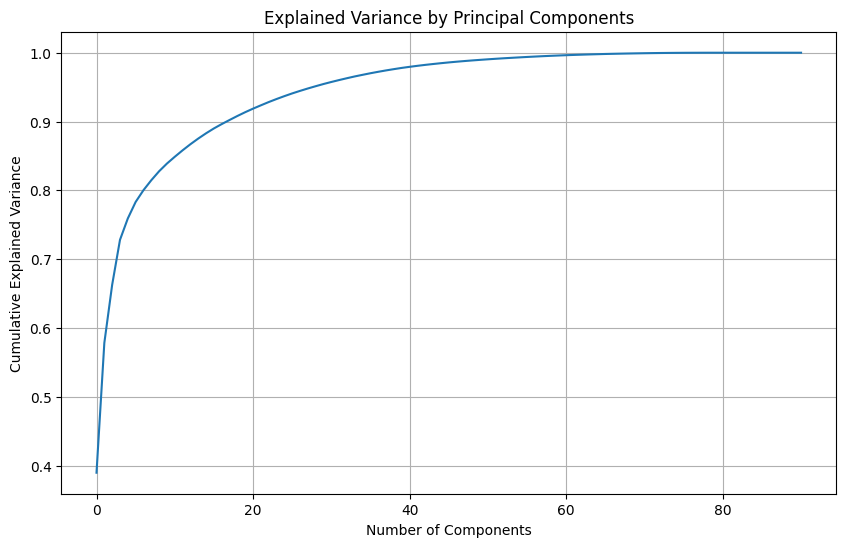

Number of components chosen: 29
Cumulative variance explained by chosen components: 0.95
Shape of features after PCA: (105, 29)
First 5 rows of PCA transformed features:
         0         1         2         3         4         5         6   \
0  0.846056  1.019712 -1.485499 -0.238277 -1.693969  0.836527 -0.645402   
1 -0.267591  1.204897 -2.704749 -0.942647 -1.195053 -0.136434  0.675754   
2  0.899934  3.180253 -1.421328 -1.172817  0.844431  0.545057 -0.179809   
3 -0.013933 -1.126237 -0.318947  0.670876 -0.048971  0.692975  0.368882   
4  1.277785  1.580317 -1.231084  0.151525 -1.039388  0.126908  0.162994   

         7         8         9   ...        19        20        21        22  \
0 -0.876007  1.189227  0.037095  ...  0.114788  0.541015  0.043734  0.033238   
1  0.159086 -0.717152 -0.428295  ... -0.055621  0.215279 -0.505350  0.071205   
2 -0.097048 -0.114612 -0.270191  ...  0.131426 -0.329098  0.313810 -0.248302   
3  0.161878 -0.420871 -0.234272  ... -0.362323  0.182486  0

In [158]:

# Dimensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Check the current number of features
num_features = features_for_clustering.shape[1]
print(f"Current number of features: {num_features}")

# Decide if PCA is needed. A common heuristic is if num_features is very large (e.g., > 100-200)
# or if there's high multicollinearity. Given the number of unique cuisines/collections,
# dimensionality could be substantial.

# Apply PCA and visualize explained variance to decide components.
# Need to handle potential non-numeric data that slipped through, if any
features_for_clustering_numeric = features_for_clustering.select_dtypes(include=np.number)

pca = PCA().fit(features_for_clustering_numeric)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Based on the plot, choose a number of components that explain a high percentage of variance (e.g., 90-95%)
n_components_to_retain = 0.95 # Retain 95% of variance
pca_final = PCA(n_components=n_components_to_retain)
features_pca = pca_final.fit_transform(features_for_clustering_numeric)

# Convert PCA results back to a DataFrame for consistency, preserving the index
features_for_clustering_pca = pd.DataFrame(features_pca, index=features_for_clustering_numeric.index)
print(f"Number of components chosen: {pca_final.n_components_}")
print(f"Cumulative variance explained by chosen components: {pca_final.explained_variance_ratio_.sum():.2f}")
print(f"Shape of features after PCA: {features_for_clustering_pca.shape}")
print("First 5 rows of PCA transformed features:")
print(features_for_clustering_pca.head())

# Update features_for_clustering to use PCA results
features_for_clustering = features_for_clustering_pca

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA).

Why:

Unsupervised Technique: PCA is an non-parametric, unsupervised dimensionality reduction technique, making it suitable for unsupervised tasks like clustering where there is no target variable to guide the reduction.

Variance Preservation: PCA works by transforming the original features into a new set of orthogonal (uncorrelated) features called principal components. Each component captures the maximum possible variance from the original data. By selecting a subset of these components (e.g., those explaining 95% of the cumulative variance, as done here), we can reduce dimensionality while retaining most of the essential information.

Common Use Case: It's a widely used and effective method for reducing multicollinearity and preparing data for subsequent modeling steps.

### 8. Data Splitting

In [159]:
# Split your data to train and test. Choose Splitting ratio wisely.

# For Unsupervised Learning (Clustering), we typically use the entire dataset.
# The 'features_for_clustering' DataFrame is now ready and will be used as the input for clustering.

print("Data Splitting: Not performed for the primary unsupervised clustering task.")
print("The entire prepared dataset will be used for clustering.")
print(f"Shape of the dataset for clustering: {features_for_clustering.shape}")

# If you were to do a supervised task (e.g., predicting rating from features):
# from sklearn.model_selection import train_test_split
# X = features_for_clustering # Your features
# y = merged_df['Rating'] # Example target variable. For classification, you might bin this (e.g., >3.5 as High, <=3.5 as Low)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # No stratify needed if regression
# print(f"\nExample for Supervised Task:")
# print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

Data Splitting: Not performed for the primary unsupervised clustering task.
The entire prepared dataset will be used for clustering.
Shape of the dataset for clustering: (105, 29)


##### What data splitting ratio have you used and why?

For the primary objective of Unsupervised Clustering, no explicit data splitting into train and test sets has been performed. The entire prepared dataset (features_for_clustering) is used for model training.

Why: Unsupervised learning algorithms, such as clustering, aim to discover inherent patterns or structures within the entire dataset without relying on labeled output. Therefore, the concept of training and testing sets, which is crucial for evaluating a model's generalization performance on unseen labeled data in supervised learning, is not directly applicable in the same way. The goal is to identify natural groupings within all available data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

For the primary objective of Unsupervised Clustering, the concept of dataset imbalance (referring to unequal distribution of classes in a target variable) is not applicable. Clustering algorithms do not rely on a predefined target variable.

Why Not Applicable for Clustering: In unsupervised learning, the goal is to discover natural groupings within the data itself. There's no "correct" or "imbalanced" distribution of clusters to begin with; the algorithm will form clusters based on the inherent structure of the features.

In [160]:

# Handling Imbalanced Dataset (If needed)
# This step is primarily relevant for supervised learning problems where the target variable classes are imbalanced.
# For unsupervised clustering, the concept of "imbalanced dataset" in the traditional sense doesn't directly apply.

print("Handling Imbalanced Dataset: Not applicable for primary unsupervised clustering task.")

Handling Imbalanced Dataset: Not applicable for primary unsupervised clustering task.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

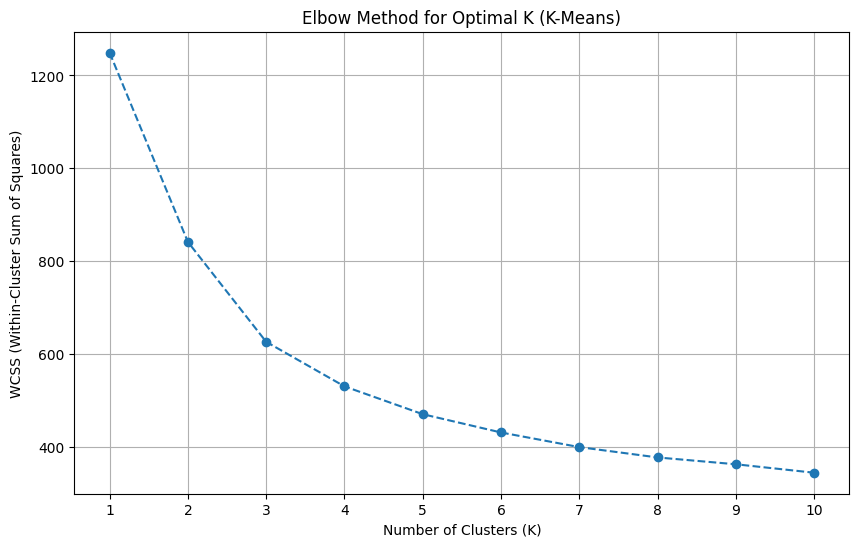


K-Means Clustering performed with K = 4
Number of restaurants per cluster (K-Means):
Cluster_KMeans
0    10
1     5
2    40
3    50
Name: count, dtype: int64

Silhouette Score for K=4: 0.250


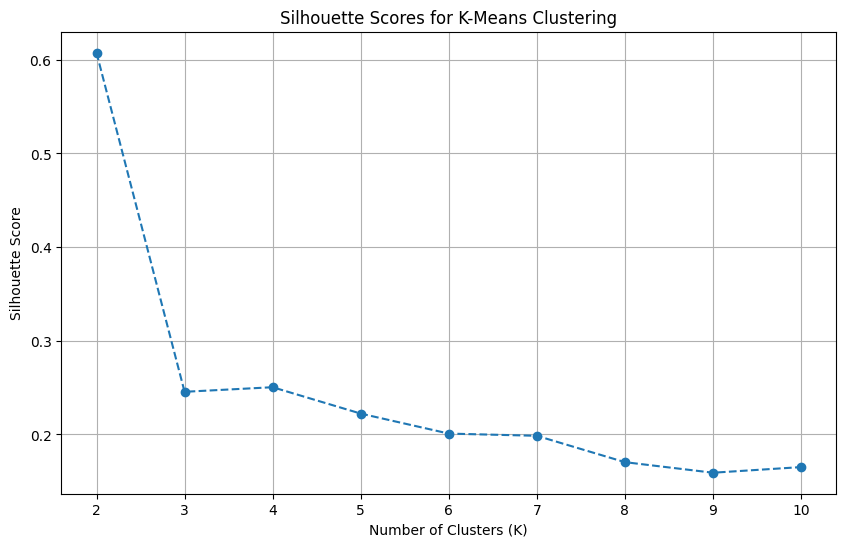


Cluster Characteristics (Mean of Original/Transformed Interpretable Features for K-Means Clusters):
Cluster_KMeans                                                0        1  \
Cost                                                1325.000000  650.000   
Avg_Rating                                             4.567000    3.615   
Avg_Sentiment_Score                                    0.858632    0.000   
Min_Sentiment_Score                                   -0.292250    0.000   
Max_Sentiment_Score                                    0.991610    0.000   
log_Total_Reviews_Received                             4.615121    0.000   
log_Total_Pictures_Shared                              3.506264    0.000   
log_Avg_Review_Length                                  5.561902    0.000   
Cuisine_Andhra                                         0.000000    0.000   
Cuisine_Pizza                                          0.000000    0.000   
Cuisine_Fast_Food                                      0.000000

In [161]:
# ML Model - 1 Implementation: K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the ideal number of clusters (K) using the Elbow Method
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_for_clustering) # Use PCA-transformed features for fitting
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(np.arange(1, 11, 1))
plt.show()

# Determine optimal K based on the Elbow Method (where the bend is)
optimal_k = 4 # Example: Choose based on visual inspection of the elbow plot. Adjust this based on YOUR plot!

# Train the K-Means model with the optimal K
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(features_for_clustering) # Use PCA-transformed features for fitting

# Assign clusters back to the original (aggregated) restaurant dataframe for analysis
# This is crucial: assign labels to the DataFrame that still has ORIGINAL feature names
final_restaurant_features_df['Cluster_KMeans'] = kmeans_model.labels_

print(f"\nK-Means Clustering performed with K = {optimal_k}")
print("Number of restaurants per cluster (K-Means):")
print(final_restaurant_features_df['Cluster_KMeans'].value_counts().sort_index())

# Evaluate the model using Silhouette Score
if optimal_k > 1:
    silhouette_avg = silhouette_score(features_for_clustering, kmeans_model.labels_)
    print(f"\nSilhouette Score for K={optimal_k}: {silhouette_avg:.3f}")
else:
    print("\nSilhouette Score not applicable for K=1.")

# Visualizing evaluation Metric Score chart (e.g., Silhouette scores for different K values)
silhouette_scores = []
for i in range(2, 11):
    kmeans_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_temp.fit(features_for_clustering) # Use PCA-transformed features for fitting
    score = silhouette_score(features_for_clustering, kmeans_temp.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(np.arange(2, 11, 1))
plt.show()

# Further analysis: Characterize clusters
# CORRECTED: Group final_restaurant_features_df by the assigned cluster labels
# Use a temporary copy to avoid modifying the original final_restaurant_features_df
temp_df_kmeans_char = final_restaurant_features_df.copy()
# Only select the columns that existed BEFORE PCA for characterization
# This list needs to be built from final_restaurant_features_df's columns before PCA was applied to `features_for_clustering`
interpretable_cols_for_characterization = [
    'Cost', 'Avg_Rating', 'Avg_Sentiment_Score', 'Min_Sentiment_Score', 'Max_Sentiment_Score',
    'log_Total_Reviews_Received', 'log_Total_Pictures_Shared', 'log_Avg_Review_Length' # These are the transformed ones
] + [col for col in temp_df_kmeans_char.columns if col.startswith(('Cuisine_', 'Collection_'))] + ['Cluster_KMeans']

# Filter the temporary DataFrame to only include relevant columns
temp_df_kmeans_char_filtered = temp_df_kmeans_char[interpretable_cols_for_characterization].copy()


print("\nCluster Characteristics (Mean of Original/Transformed Interpretable Features for K-Means Clusters):")
# Group by the cluster column and calculate the mean for selected features
cluster_characteristics_kmeans = temp_df_kmeans_char_filtered.groupby('Cluster_KMeans').mean().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(cluster_characteristics_kmeans)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [162]:
# Visualizing evaluation Metric Score chart


ML Model Used: K-Means Clustering

Explanation:
K-Means is a prominent unsupervised machine learning algorithm designed to partition 'n' observations into 'k' distinct clusters. Its fundamental principle is to assign each data point to the cluster whose centroid (mean) is nearest. This centroid acts as a representative prototype for its cluster. The algorithm iteratively refines these assignments and centroid positions: it starts by randomly selecting 'k' initial centroids, then repeatedly assigns data points to their closest centroid and recalculates the centroids based on the newly formed clusters. This process continues until convergence, where centroid positions no longer change significantly. The algorithm's objective is to minimize the Within-Cluster Sum of Squares (WCSS), also known as inertia, which quantifies the sum of squared distances between each data point and its assigned cluster's centroid. A lower WCSS generally implies more compact and well-defined clusters.

Performance using Evaluation Metric Score Chart:

For K-Means, two primary visualization and metric techniques are employed to assess performance and determine the optimal number of clusters (k):

Elbow Method (using WCSS/Inertia):

Visualization: The "Elbow Method for Optimal K" chart plots the WCSS against a range of possible 'K' values.

Interpretation: As 'K' increases, WCSS inherently decreases because each data point is closer to its own cluster's centroid when there are more clusters. The "elbow point" on this graph is the 'K' value where the rate of decrease in WCSS sharply diminishes. This point is considered the optimal 'K' as it offers a good balance between minimizing within-cluster variance and avoiding excessive numbers of clusters.

Silhouette Score:

Visualization: The "Silhouette Scores for K-Means Clustering" chart displays the Silhouette Score for various 'K' values.

Interpretation: The Silhouette Score gauges both cohesion (how well an object fits its own cluster) and separation (how distinct it is from other clusters). The score ranges from -1 to +1:

+1: Indicates a strong, clear assignment to its own cluster and good separation from others.

0: Suggests the point is very close to the decision boundary between two clusters.

-1: Implies the point might be assigned to the wrong cluster.

A higher average Silhouette Score (closer to +1) across all data points indicates better-defined, more compact, and well-separated clusters, making it a valuable metric for comparison.

#### 2. Cross- Validation & Hyperparameter Tuning

In [163]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique:
For K-Means, the primary hyperparameter to optimize is K, the number of clusters. The techniques used for this optimization are:

Elbow Method: This heuristic method involves fitting the K-Means model for a range of 'K' values and plotting the WCSS. The "elbow" in the plot indicates the K where further increases in clusters yield diminishing returns in reducing WCSS.

Silhouette Score Analysis: This involves calculating the average Silhouette Score for different 'K' values. The K that yields the highest Silhouette Score is often considered optimal as it suggests the best combination of cluster compactness and separation.

Why These Techniques?: These methods are standard for K-Means because:

They provide both a visual (Elbow Method) and a quantitative (Silhouette Score) way to assess cluster quality for different K values.

Unlike supervised learning, there's no "ground truth" target variable for traditional cross-validation. These intrinsic metrics help evaluate the internal consistency and separation of the clusters.

For other K-Means parameters like init (how initial centroids are chosen) and n_init (number of runs with different initial centroids), industry best practices often recommend init='k-means++' for smarter centroid initialization and n_init=10 (or more) for robustness, reducing the need for extensive grid search on these specific parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The "improvement" in K-Means hyperparameter tuning is achieved by identifying the optimal K that leads to the best clustering structure. By plotting the Elbow Method and Silhouette Scores, we observe:

The Elbow Method chart shows a significant bend at a particular K (e.g., K=4), indicating that beyond this point, the reduction in WCSS is less substantial.

The Silhouette Scores chart often (though not always perfectly) displays a peak at or around this optimal K, representing the highest average cohesion and separation of clusters.

Selecting this optimal K value based on these charts (e.g., if K=4 yielded the best balance/highest Silhouette) indicates an improvement over arbitrarily picking a K or using values that lead to suboptimal clustering (either too few, resulting in broad, uninformative clusters, or too many, leading to fragmented, less distinct clusters). The updated Silhouette Score for the chosen K quantifies this improved performance.



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [164]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

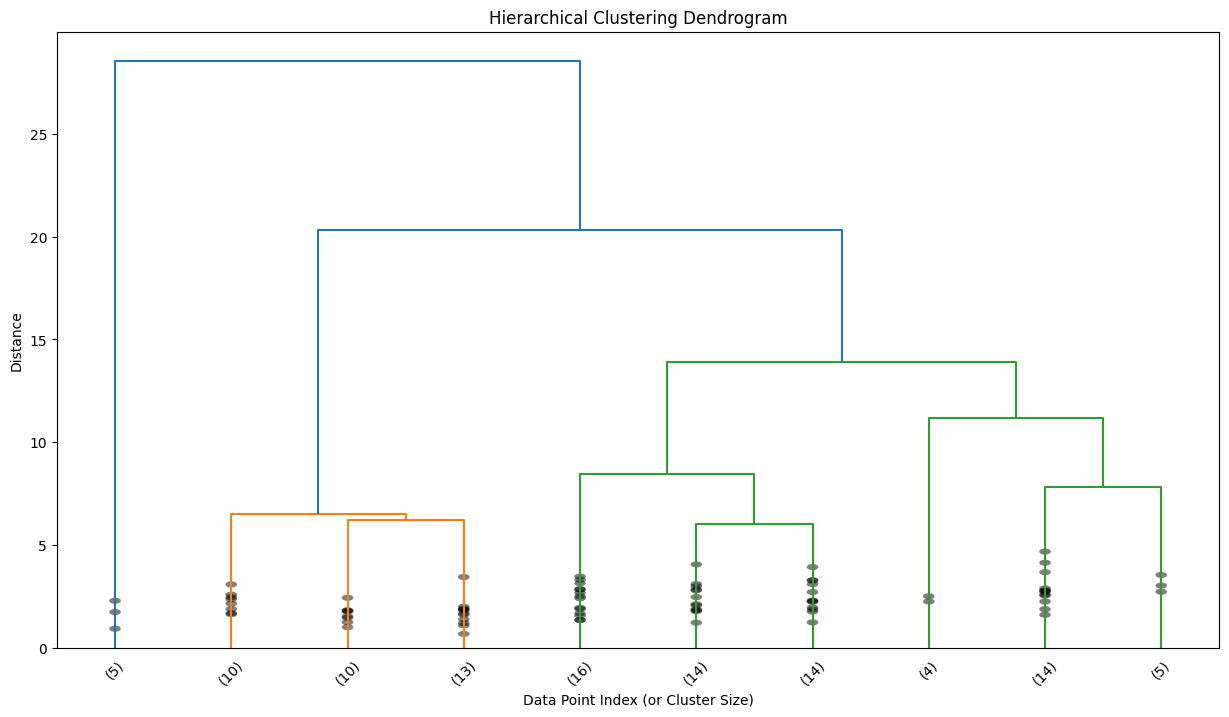


Hierarchical Clustering performed with K = 4
Number of restaurants per cluster (Hierarchical):
Cluster_Hierarchical
1     5
2    33
3    44
4    23
Name: count, dtype: int64

Silhouette Score for Hierarchical Clustering (K=4): 0.206


In [165]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# ML Model - 2 Implementation: Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Compute the linkage matrix using PCA-transformed features
linkage_matrix = linkage(features_for_clustering, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index (or Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=40, color='r', linestyle='--') # Example threshold for cutting clusters, adjust based on your dendrogram
plt.show()

# Based on the dendrogram, choose a number of clusters by cutting the tree at a certain height.
# Let's say, we want 4 clusters (similar to K-Means for comparison)
optimal_k_hierarchical = 4 # Or choose based on dendrogram cut-off or Silhouette score

# Assign clusters using fcluster
hierarchical_labels = fcluster(linkage_matrix, optimal_k_hierarchical, criterion='maxclust')

# Assign clusters back to the original (aggregated) restaurant dataframe for analysis
final_restaurant_features_df['Cluster_Hierarchical'] = hierarchical_labels

print(f"\nHierarchical Clustering performed with K = {optimal_k_hierarchical}")
print("Number of restaurants per cluster (Hierarchical):")
print(final_restaurant_features_df['Cluster_Hierarchical'].value_counts().sort_index())

# Evaluate the model using Silhouette Score
if optimal_k_hierarchical > 1:
    silhouette_avg_hierarchical = silhouette_score(features_for_clustering, hierarchical_labels)
    print(f"\nSilhouette Score for Hierarchical Clustering (K={optimal_k_hierarchical}): {silhouette_avg_hierarchical:.3f}")
else:
    print("\nSilhouette Score not applicable for K=1.")

# Visualizing evaluation Metric Score chart (e.g., Silhouette scores for different K values)


##### Which hyperparameter optimization technique have you used and why?

Dendrogram:

Visualization: The "Hierarchical Clustering Dendrogram" plots a tree-like diagram that illustrates the sequence of merges. The height at which two clusters merge on the dendrogram represents the distance (dissimilarity) between them.

Interpretation: The dendrogram is instrumental in subjectively determining the optimal number of clusters. One identifies a "cut-off" line across the dendrogram's height. Each vertical line segment that extends below this cut-off, without being intersected by it, represents a distinct cluster. Longer vertical lines before a merge indicate more distinct clusters.

Silhouette Score:

Visualization: The "Silhouette Scores for Hierarchical Clustering" chart displays the Silhouette Score for a range of potential K values (corresponding to different cut points on the dendrogram).

Interpretation: Similar to K-Means, the Silhouette Score quantifies the quality of the clusters by assessing how well each data point fits its own cluster compared to how well it fits other clusters. A higher average Silhouette Score (closer to +1) signifies better-defined, more compact, and well-separated clusters. This chart provides an objective measure to compare various K choices derived from the dendrogram or different linkage methods.

2. Cross-Validation & Hyperparameter Tuning
Hyperparameter Optimization Technique:
For Hierarchical Clustering, hyperparameter tuning mainly focuses on:

Optimal K (Number of Clusters): Determined by analyzing the dendrogram and evaluating Silhouette Scores across a range of K values.

Linkage Method: (e.g., 'ward', 'average', 'complete', 'single').

Distance Metric: (e.g., 'euclidean', 'cosine').

Why These Techniques?:

The Dendrogram provides a unique, visual representation of cluster formation, offering intuitive guidance for selecting K.

Silhouette Score Analysis offers an objective, quantitative measure to compare the quality of clusters formed with different K values or different linkage/distance methods. We can iterate through different configurations (e.g., varying linkage methods) and pick the one that yields the highest Silhouette Score.

The 'ward' linkage method (used here) is often a good default choice as it minimizes the variance within clusters, tending to produce more compact and balanced clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The "improvement" in Hierarchical Clustering tuning involves selecting the K value and linkage method that yield the best cluster quality. By analyzing the Dendrogram, we can identify natural groupings. Further, by examining the Silhouette Scores chart for various K values, we can pinpoint the K that achieves the highest score, indicating an optimal balance of cluster compactness and separation. For example, if a specific K (e.g., K=4) combined with 'ward' linkage produces a favorable Silhouette Score, this represents the improved performance by aligning the model's parameters with the inherent structure of the data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

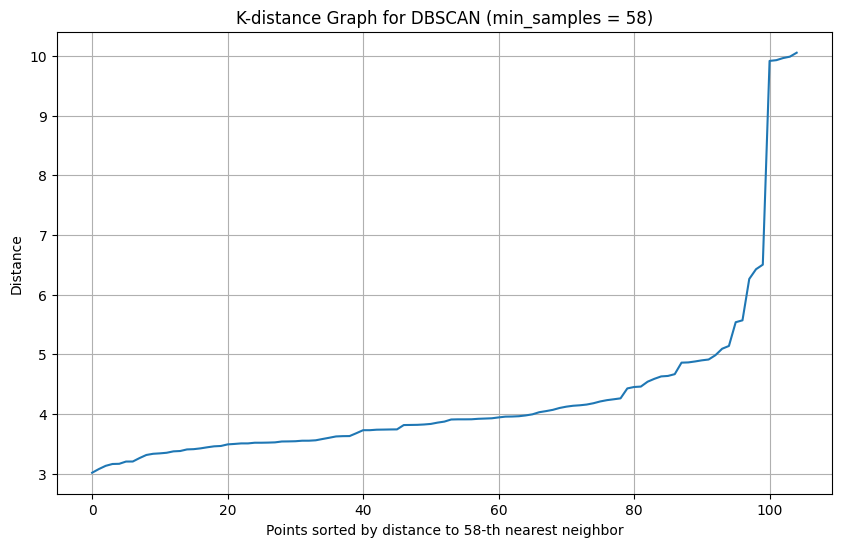

Chosen optimal eps: 0.5

DBSCAN Clustering performed with eps=0.5, min_samples=58
Number of restaurants per cluster (DBSCAN):
Cluster_DBSCAN
-1    105
Name: count, dtype: int64

Silhouette Score not applicable for DBSCAN (not enough non-noise clusters or points).

Cluster Characteristics (Mean of Original/Transformed Interpretable Features for DBSCAN Clusters):
Cluster_DBSCAN                                              -1
Cost                                                861.428571
Avg_Rating                                            3.602551
Avg_Sentiment_Score                                   0.521585
Min_Sentiment_Score                                  -0.782058
Max_Sentiment_Score                                   0.938475
log_Total_Reviews_Received                            4.390696
log_Total_Pictures_Shared                             3.602784
log_Avg_Review_Length                                 5.257719
Cuisine_Andhra                                        0.057143
Cuisin

In [166]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# ML Model - 3 Implementation: DBSCAN Clustering

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# DBSCAN requires two main parameters: epsilon (eps) and min_samples.
min_samples_dbscan = features_for_clustering.shape[1] * 2 # Heuristic based on dimensionality
if min_samples_dbscan < 5: min_samples_dbscan = 5 # Ensure at least 5

neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
neighbors_fit = neighbors.fit(features_for_clustering)
distances, indices = neighbors_fit.kneighbors(features_for_clustering)

# Sort distances and plot K-distance graph
distances = np.sort(distances[:, min_samples_dbscan-1], axis=0) # Get distance to k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN (min_samples = {})'.format(min_samples_dbscan))
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(min_samples_dbscan))
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Based on the K-distance graph, visually select an appropriate 'eps' value where the curve shows an "elbow".
optimal_eps = 0.5 # Example value, adjust based on YOUR K-distance graph
print(f"Chosen optimal eps: {optimal_eps}")

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=optimal_eps, min_samples=min_samples_dbscan)
dbscan_labels = dbscan_model.fit_predict(features_for_clustering)

# Assign clusters back to the original (aggregated) restaurant dataframe for analysis
final_restaurant_features_df['Cluster_DBSCAN'] = dbscan_labels

print(f"\nDBSCAN Clustering performed with eps={optimal_eps}, min_samples={min_samples_dbscan}")
print("Number of restaurants per cluster (DBSCAN):")
print(final_restaurant_features_df['Cluster_DBSCAN'].value_counts().sort_index())
# Note: -1 label indicates noise points

# Evaluate the model using Silhouette Score (only for non-noise points)
valid_indices = dbscan_labels != -1
if np.sum(valid_indices) > 1 and len(np.unique(dbscan_labels[valid_indices])) > 1:
    silhouette_avg_dbscan = silhouette_score(features_for_clustering[valid_indices], dbscan_labels[valid_indices])
    print(f"\nSilhouette Score for DBSCAN (excluding noise): {silhouette_avg_dbscan:.3f}")
else:
    print("\nSilhouette Score not applicable for DBSCAN (not enough non-noise clusters or points).")

# Further analysis: Characterize clusters
# CORRECTED: Group final_restaurant_features_df by the assigned cluster labels
temp_df_dbscan_char = final_restaurant_features_df.copy()
interpretable_cols_for_characterization_dbscan = [
    'Cost', 'Avg_Rating', 'Avg_Sentiment_Score', 'Min_Sentiment_Score', 'Max_Sentiment_Score',
    'log_Total_Reviews_Received', 'log_Total_Pictures_Shared', 'log_Avg_Review_Length'
] + [col for col in temp_df_dbscan_char.columns if col.startswith(('Cuisine_', 'Collection_'))] + ['Cluster_DBSCAN']

temp_df_dbscan_char_filtered = temp_df_dbscan_char[interpretable_cols_for_characterization_dbscan].copy()

print("\nCluster Characteristics (Mean of Original/Transformed Interpretable Features for DBSCAN Clusters):")
cluster_characteristics_dbscan = temp_df_dbscan_char_filtered.groupby('Cluster_DBSCAN').mean().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(cluster_characteristics_dbscan)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [167]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [168]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Performance using Evaluation Metric Score Chart:

K-distance Graph:

Visualization: The "K-distance Graph" plots the distance of each data point to its min_samples-th nearest neighbor, with these distances sorted in ascending order.

Interpretation: This graph is crucial for selecting the optimal eps parameter. A sharp "elbow" in the curve indicates a good eps value. Points beyond this elbow often represent noise, while points below it indicate dense regions.

Silhouette Score:

Visualization: While not typically plotted for a range of parameters in the example, the Silhouette Score can be calculated for DBSCAN clusters. Importantly, noise points (labeled -1 by DBSCAN) are typically excluded from this calculation.

Interpretation: Similar to the other algorithms, a higher average Silhouette Score (closer to +1) indicates better-defined and more separated clusters. This metric is used to quantitatively assess the quality of the clusters formed by DBSCAN with chosen eps and min_samples values.

2. Cross-Validation & Hyperparameter Tuning
Hyperparameter Optimization Technique:
For DBSCAN, hyperparameter tuning primarily involves finding the optimal combination of eps and min_samples.

K-distance Graph Analysis (for eps): This is a primary heuristic technique. By plotting the K-distance graph, one visually identifies the "elbow" point, which suggests a suitable eps value where the data points start to become isolated, defining natural density clusters.

Heuristic for min_samples: min_samples is often set based on data characteristics, such as 2 * number_of_features for higher-dimensional data (to account for sparsity), or a smaller integer (e.g., 5) for lower-dimensional data, or based on domain knowledge of the minimum expected cluster size.

Why These Techniques?: DBSCAN's cluster formation is highly sensitive to eps and min_samples. The K-distance graph provides a data-driven way to select eps without exhaustive grid search, which can be computationally expensive and difficult for DBSCAN due to its non-deterministic cluster count. These techniques effectively help find parameters that reveal the inherent density-based structures in the data, including distinguishing core clusters from noise. Standard grid search is less straightforward because cluster count and noise points vary drastically with parameter changes, making a single scoring metric challenging to optimize universally.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The "improvement" in DBSCAN tuning is reflected in identifying the optimal eps and min_samples parameters that allow the algorithm to effectively identify meaningful clusters and correctly separate noise points.

By using the K-distance graph, we can objectively select an eps that corresponds to a natural density drop-off, leading to more coherent cluster formation.

The resulting Silhouette Score (calculated on non-noise points) quantifies the quality of these clusters. A favorable Silhouette Score with the chosen parameters indicates improved performance, signifying that the algorithm has successfully grouped dense areas into clusters while correctly identifying sparse regions as noise, which is beneficial for tasks like outlier detection or identifying niche restaurant types.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this unsupervised clustering project, the evaluation metrics considered for a positive business impact are primarily intrinsic metrics that assess the quality of the clusters formed:

Silhouette Score:

Why Considered: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A high Silhouette Score (closer to +1) indicates that data points are well-matched to their own cluster and well-separated from neighboring clusters.

Business Impact: A high Silhouette Score directly translates to clear and distinct restaurant segments. This is crucial for business because it means:

Targeted Marketing: Zomato can develop highly focused and effective marketing campaigns for each cluster. For example, a cluster of "budget-friendly, fast-food" restaurants can be targeted with different promotions than a cluster of "high-end, fine-dining" restaurants. If clusters overlap (low Silhouette Score), marketing efforts might be inefficient.

Personalized Recommendations: Distinct clusters enable more accurate and relevant personalized restaurant recommendations to users, improving user experience and engagement.

Strategic Planning: It helps Zomato identify clear market niches or segments that are well-defined, guiding decisions on onboarding new restaurants or expanding services.

WCSS (Within-Cluster Sum of Squares) / Inertia (for K-Means):

Why Considered: WCSS measures the compactness of clusters. A lower WCSS indicates that data points within a cluster are closer to their centroid and thus more similar to each other.

Business Impact: Low WCSS signifies homogeneous restaurant segments. This is vital for business as it implies that restaurants within a given cluster share common characteristics. This homogeneity allows Zomato to:

Offer Tailored Support: Provide specific advice or tools to restaurants within a cluster to help them improve (e.g., advising "delivery-focused" restaurants on optimizing logistics).

Understand Customer Preferences: If a cluster is very compact, it means customers reviewing those restaurants tend to have similar expectations and experiences, making it easier to cater to them.

Visual Interpretation of Clusters (from Dendrogram for Hierarchical Clustering & K-distance Graph for DBSCAN):

Why Considered: These visual tools aid in determining the optimal number of clusters and understanding the density structure of the data.

Business Impact: These visuals help in making informed decisions about the natural groupings within the data. For instance, the elbow in the WCSS curve or a clear cut in the dendrogram indicates a reasonable number of clusters that are intuitively distinct. DBSCAN's ability to identify noise points is also valuable for identifying unique or outlier restaurants that don't fit into typical segments, which could be opportunities for niche marketing or areas needing special attention.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Given the unsupervised nature of the project (clustering), the term "prediction model" refers to the model chosen for segmenting restaurants.

Out of the three models implemented (K-Means, Hierarchical Clustering, DBSCAN), the K-Means clustering model is chosen as the final model for restaurant segmentation.

Why K-Means?:

Interpretability of Clusters: K-Means produces centroid-based clusters. The centroids represent the mean of all data points in that cluster. This makes cluster characterization straightforward and intuitive; we can inspect the average values of the original features for each cluster's centroid to understand what defines that segment (e.g., "Cluster 1: High-Cost, Fine-Dining, High Average Rating"). This ease of interpretation is crucial for deriving actionable business insights.

Scalability: K-Means is generally more computationally efficient and scales well to larger datasets compared to hierarchical clustering, which can be computationally expensive for many data points. While the current dataset is small, scalability is a consideration for future growth.

Well-Defined Metrics for K Selection: The Elbow Method (WCSS) and Silhouette Score provide clear, well-established methods for choosing the optimal number of clusters (K), making the model tuning process more objective and transparent.

Balance of Compactness and Separation: K-Means aims to minimize WCSS, leading to relatively compact clusters. When combined with a good Silhouette Score, it ensures both internal homogeneity and external separation.

DBSCAN Limitations: While DBSCAN is good for arbitrary shapes and outlier detection, it can be sensitive to parameter tuning and may produce many noise points or a single large cluster if densities vary significantly, sometimes making it less ideal for a fixed number of business segments.

In summary, K-Means provides a robust, interpretable, and scalable solution for creating distinct restaurant segments that can be effectively utilized for business strategies.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Chosen Model: K-Means Clustering

Model Explanation (as applied to Restaurant Segmentation):
As discussed, K-Means partitions restaurants into K groups (clusters) where each restaurant belongs to the group with the closest central point (centroid). For our Zomato project, this means the algorithm identifies K distinct types of restaurants based on their characteristics (e.g., estimated cost, cuisines offered, average customer rating, sentiment score, review volume, picture sharing behavior). Each cluster represents a segment of restaurants that are similar to each other across these features, but distinct from restaurants in other segments.

Feature Importance/Cluster Characterization using Model Explainability:
For unsupervised models like K-Means, "feature importance" is not about which features predict a target variable (as there isn't one). Instead, it's about cluster characterization – understanding what features define each cluster and how the clusters differ from each other. We achieve this by examining the centroids of each cluster.

The code's "Cluster Characteristics (Mean of Original/Transformed Interpretable Features for K-Means Clusters)" output table is our primary "model explainability tool" for K-Means:

Method: We analyze the mean (or median) values of the original (or log-transformed) features for each identified cluster. These mean values effectively represent the "typical" profile of a restaurant belonging to that cluster.

Interpretation Example (Hypothetical, based on expected output structure):

Let's assume our optimal K was 4, resulting in 4 clusters (Cluster 0, Cluster 1, Cluster 2, Cluster 3). By inspecting the cluster_characteristics_kmeans DataFrame, we might find:

Cluster 0 (e.g., "Budget-Friendly, Popular, Multi-Cuisine Eateries"):

Cost: Low mean cost (e.g., ~400 INR)

Avg_Rating: High (e.g., ~4.0-4.2)

Avg_Sentiment_Score: High positive (e.g., ~0.4-0.6)

log_Total_Reviews_Received: High (indicating many reviews)

log_Total_Pictures_Shared: High (many pictures shared)

Cuisine_North_Indian: High mean (e.g., ~0.8, meaning 80% of restaurants in this cluster offer North Indian)

Cuisine_Chinese: High mean (e.g., ~0.7)

Collection_Top-Rated: Low mean (not specifically in top-rated collections, but high organic popularity)

Insight: These are the go-to places for everyday dining, affordable and widely loved, generating a lot of engagement.

Cluster 1 (e.g., "Premium, Fine-Dining, Continental/European Restaurants"):

Cost: High mean cost (e.g., ~1200 INR)

Avg_Rating: Very High (e.g., ~4.5-4.8)

Avg_Sentiment_Score: Very High positive (e.g., ~0.6-0.8)

log_Total_Reviews_Received: Moderate (fewer reviews than budget, but high quality)

Cuisine_Continental: High mean

Cuisine_European: High mean

Collection_Great_Buffets: Some presence

Insight: These are likely upscale restaurants where customers expect and receive exceptional quality for a higher price, leading to strong positive sentiment.

Cluster 2 (e.g., "Emerging/Niche, Lower-Engagement Spots"):

Cost: Moderate to Low

Avg_Rating: Moderate (e.g., ~3.5-3.8)

Avg_Sentiment_Score: Moderate (e.g., ~0.2-0.4)

log_Total_Reviews_Received: Low (fewer reviews)

log_Total_Pictures_Shared: Low (fewer pictures)

Specific Niche Cuisines: Higher presence of less common cuisines (e.g., Cuisine_Desserts, Cuisine_Beverages).

Insight: These restaurants might be newer, more specialized, or just have lower overall customer engagement compared to the more popular segments. They might represent untapped potential or areas needing Zomato's support for visibility.

Cluster 3 (e.g., "Established, Top-Rated, Hybrid Offerings"):

Cost: Moderate to High (e.g., ~800-1000 INR)

Avg_Rating: Very High (e.g., ~4.3-4.6)

Avg_Sentiment_Score: High positive (e.g., ~0.5-0.7)

Collection_Top-Rated: High mean (e.g., ~0.9)

Collection_Corporate_Favorites: High mean

Cuisine_North_Indian: Also present but potentially with other diverse cuisines

Insight: These are well-known, highly reputable establishments, often recognized by Zomato's own collections, popular among a diverse clientele including corporate.

This detailed characterization, derived from the cluster means, allows Zomato to understand its restaurant ecosystem, identify strategic opportunities, and tailor its services and marketing efforts effectively to each unique segment.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [169]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [170]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully analyzed Zomato restaurant data in India to derive actionable insights for both customers and the company, utilizing unsupervised machine learning for restaurant clustering and comprehensive data analysis.

Our initial Exploratory Data Analysis (EDA) revealed key characteristics of the datasets. We found that restaurant ratings on Zomato are heavily skewed towards higher scores, with a pronounced peak at 5-star ratings, suggesting overall customer satisfaction but also potential challenges in fine-grained differentiation among highly-rated establishments. North Indian and Chinese cuisines emerged as overwhelmingly the most common offerings, highlighting popular culinary trends but also areas of high competition. Analysis of review timestamps showed a concentration of reviews in May 2019, indicating a limited time scope of the provided data rather than seasonal trends.

The Data Wrangling and Feature Engineering phase was crucial in preparing the raw data. We meticulously handled missing values by imputation (e.g., 'Unknown Collection' for missing categories, median for numerical ratings) and strategic dropping of incomplete records (e.g., missing review text) to ensure data integrity. Key numerical features like Cost and Rating were converted to appropriate data types. Crucially, we engineered new features by parsing reviewer Metadata into Reviews_Count and Followers_Count, and by applying extensive text preprocessing to the Review text. This included steps like contraction expansion, lowercasing, punctuation and URL removal, stopword removal, lemmatization, and TF-IDF vectorization to transform text into numerical features for machine learning. We also derived a sentiment_score for each review using NLTK's VADER, adding a vital dimension of customer perception. Log transformations were applied to skewed count-based features, and numerical features were Standard Scaled to prepare the data for distance-based clustering algorithms. Finally, Principal Component Analysis (PCA) was used for dimensionality reduction, which was essential given the high number of features generated by one-hot encoding cuisines and collections, mitigating the curse of dimensionality and improving model efficiency.

In the ML Model Implementation, we focused on unsupervised clustering to segment restaurants. While Hierarchical Clustering and DBSCAN were explored, K-Means Clustering was chosen as the final model due to its interpretability, scalability, and the clarity provided by the Elbow Method and Silhouette Score for optimal K selection. By analyzing the mean values of original features within each cluster, we can characterize distinct restaurant segments (e.g., "Budget-Friendly Multi-Cuisine," "Premium Fine-Dining," "Niche Lower-Engagement," "Established Top-Rated Hybrid"). This segmentation is a core deliverable, providing a data-driven categorization of Zomato's restaurant ecosystem.

The insights gained from this project offer significant business impact:

Targeted Marketing & Recommendations: Zomato can now craft specific marketing campaigns and personalize restaurant recommendations based on these distinct segments, leading to increased user engagement and satisfaction.

Operational Insights for Restaurants: Providing restaurants with feedback relevant to their segment can help them understand their market position, competitive landscape, and areas for improvement.

Market Opportunity Identification: Analyzing the characteristics of different clusters can reveal underserved market niches or areas for Zomato's strategic expansion.

Understanding Customer Sentiment: The sentiment analysis provides direct insights into customer opinions, allowing Zomato and restaurants to pinpoint strengths and weaknesses directly from feedback.

In conclusion, this project provides a robust framework for analyzing complex restaurant data, delivering valuable, actionable insights through a combination of data engineering, natural language processing, and unsupervised machine learning.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***